In [8]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statistics as st
import tensorflow as tf 
from tensorflow import keras 

 ----------------- hospital_death per diabetes_mellitus ----------------- 


hospital_death,0,1
diabetes_mellitus,,
diabetico,13157,1111
n diabetico,45053,4366


Text(0.5, 0, 'diabetes_mellitus')

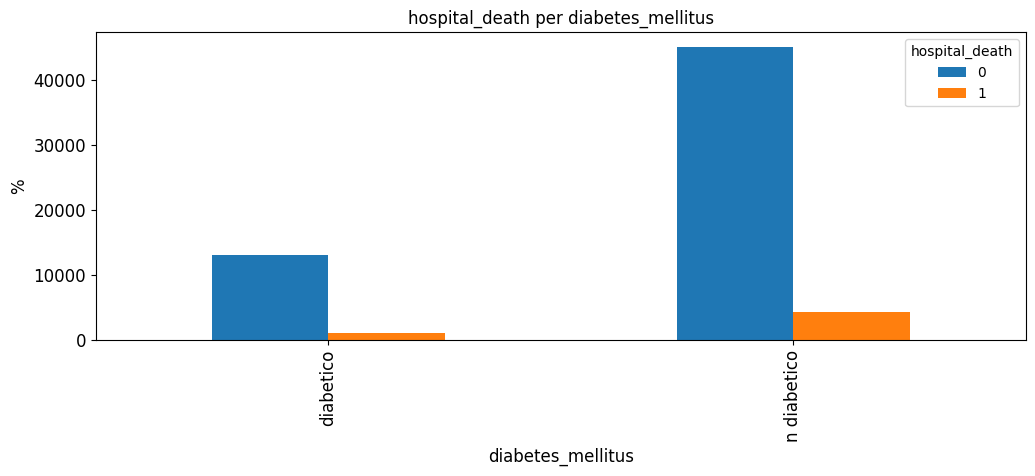

In [42]:
dataframe = dados
varName1 = "diabetes_mellitus"
varName2 = "hospital_death"
ax = None
SQ_tb = pd.crosstab(index = dataframe[varName1].map(({1.0: 'diabetico', 0.0: 'n diabetico'})),columns = dataframe[varName2])#, margins = True
title = varName2  + " per " +  varName1 
print(" ----------------- " + title + " ----------------- ")
display(SQ_tb)

if ax is None:
    fig, ax = plt.subplots(figsize=(12, 4))

image = SQ_tb.plot(kind="bar", figsize=(12,4), stacked=False,title=title,fontsize=12,ax= ax)
image.set_ylabel("%",fontsize=12)
image.set_xlabel(varName1,fontsize=12) 


 ----------------- hospital_death per diabetes_mellitus ----------------- 


hospital_death,0,1
diabetes_mellitus,,
0.0,45053,4366
1.0,13157,1111


Text(0.5, 0, 'diabetes_mellitus')

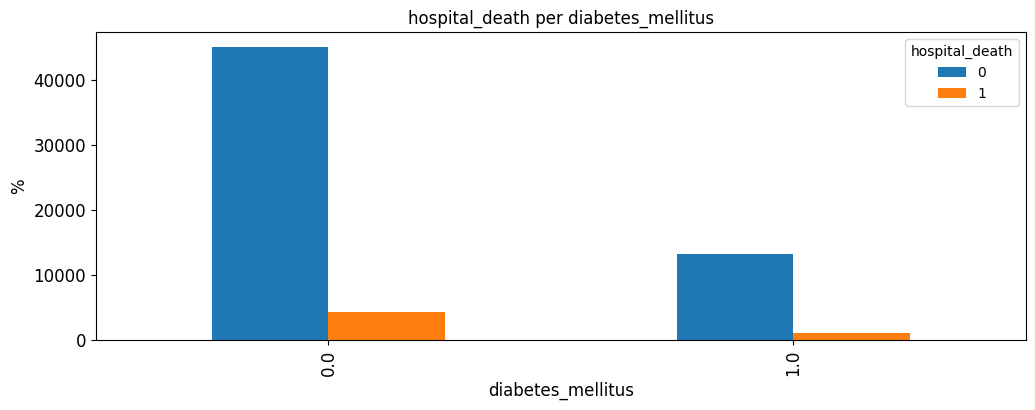

In [31]:
dataframe = dados
varName1 = "diabetes_mellitus"
varName2 = "hospital_death"
ax = None
SQ_tb = pd.crosstab(index = dataframe[varName1],columns = dataframe[varName2])#, margins = True
title = varName2  + " per " +  varName1 
print(" ----------------- " + title + " ----------------- ")
display(SQ_tb)

if ax is None:
    fig, ax = plt.subplots(figsize=(12, 4))

image = SQ_tb.plot(kind="bar", figsize=(12,4), stacked=False,title=title,fontsize=12,ax= ax)
image.set_ylabel("%",fontsize=12)
image.set_xlabel(varName1,fontsize=12) 


In [9]:
def grafico_qualitativa(var,dataframe, ax=None):
     dados_qualitativa = dataframe[var].value_counts(normalize = True).reset_index(name='Frequência').rename(columns={'index':var})
     display(dados_qualitativa)
     
     if ax is None:
          fig, ax = plt.subplots(figsize=(12, 4))
     dados_grafico = dataframe[var].value_counts()
     dados_grafico.plot(kind='bar', ax=ax)
     
     plt.xlabel('Valores')
     plt.ylabel('Frequência')
     plt.title(f'Gráfico da Frequência: {var}')
 
def distribuição_de_Frequência(varName,dataframe):
    x = dataframe[varName]
    freq = x.value_counts(bins=20, 
                            sort=False)
    display(pd.DataFrame(freq))

def histograma(varName, dataframe):
    x = dataframe[varName]
    distribuição_de_Frequência(varName,dataframe)
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sn.histplot(dataframe[varName], color='b', bins=20, ax=axs[0])
    dataframe[varName].plot(kind='box', ax=axs[1], title='')
    axs[1].set_ylabel(varName)
    plt.tight_layout()
    plt.show()
    
def QualiQualiAssociation(varName1, varName2,dataframe, ax=None):
    SQ_tb = pd.crosstab(index = dataframe[varName1],columns = dataframe[varName2], normalize = "index")#, margins = True
    title = varName2  + " per " +  varName1 
    print(" ----------------- " + title + " ----------------- ")
    display(SQ_tb)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 4))
    
    image = SQ_tb.plot(kind="bar", figsize=(12,4), stacked=False,title=title,fontsize=12,ax= ax)
    image.set_ylabel("%")
    image.set_xlabel(varName1) 
    
def moda_czuber(data):
    freq = {}
    for i in data:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1

    moda = max(freq, key=freq.get)
    return moda     

def measuresOfPositionAndDispersion(data,key):
    dataset = pd.DataFrame({"Variavel": key ,"Quantidade": len(data),"Media": [st.mean(data.dropna())], "Moda ": moda_czuber(data.dropna()), "Mediana": [st.median(data.dropna())], "Variancia": [st.variance(data.dropna())], "Desvio padrao": [st.stdev(data.dropna())], "Amplitude": [max(data.dropna()) - min(data.dropna())]})
    return dataset

def qualitativaXquantativa(varName1,varName2,dataframe,ax = None):
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 4))
    title = varName1 + " per " + varName2
    ax.set_title(title, fontsize=12)
    sn.boxplot(data=dataframe, x=varName2, y=varName1, ax=ax)
    ax.set_ylabel(varName1, fontsize=12)
    ax.set_xlabel(varName2, fontsize=12)
    display(dataframe[[varName1, varName2]].groupby(varName2).describe())
    
def scater(varName1,varName2,dataframe,ax = None):
    if ax is None:
         _, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(dataframe[varName1], dataframe[varName2])
    title = varName1 + " per " + varName2
    ax.set_title(title)
    ax.set_xlabel(varName1)
    ax.set_ylabel(varName2)    

def Plot_pred_train(y_pred, y_train):  
    y_predict = y_pred[:100]
    y_trained = y_train[:100]
    eixo_x = range(len(y_predict))  # Supondo um eixo X baseado no índice dos dados
    # Criando o gráfico
    plt.figure(figsize=(8, 5))  # Define o tamanho do gráfico
    plt.plot(eixo_x,y_trained, label='Dados Originais', color='blue', marker='o')  # Plotando os dados originais
    plt.plot(eixo_x,y_predict, label='Previsão', color='red', marker='x')  # Plotando a previsão em vermelho

    # Adicionando títulos e rótulos
    plt.title('Comparação entre Previsão e Dados Originais')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.grid(True)  # Adiciona grade ao gráfico para melhor visualização
    plt.legend()  # Adiciona legenda

    # Exibindo o gráfico
    plt.show()
    from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score, precision_score, recall_score

def printPerformanceMeasures(model, y_true, y_pred):
    print(type(model).__name__, 'ACCURACY =', accuracy_score(y_true=y_true, y_pred=y_pred))
    print(type(model).__name__, 'MAE =', mean_absolute_error(y_true=y_true, y_pred=y_pred))
    print(type(model).__name__, 'PRECISION =', precision_score(y_true=y_true, y_pred=y_pred))
    print(type(model).__name__, 'RECALL =', recall_score(y_true=y_true, y_pred=y_pred))


# Projeto de TI
Discente: Kaio Brasil da Silva  
Docente: Paulo Renato Alves Firmino  
Disciplina: Estatística Computacional  
Curso: Matemática Computacional

# Introdução 
Este projeto dedica-se a analisar um conjunto de dados de um hospital, referente a pacientes que estão internados na UTI. Os dados foram obtidos através do Kaggle, uma plataforma de competição de ciência de dados (https://www.kaggle.com/competitions/patient-survival-prediction/data?select=test.csv).  
A base de dados dispõe de informações de exames dos pacientes, contendo por exemplo: diagnósticos para saber se o paciente tem diabetes; biópsia para verificar se o paciente possui algum tumor, além de aferições como temperatura, frequência respiratória, etc. Além disso, dados como idade, peso, índice de massa corporal, dentre outras medidas, também estão contidas no referido conjunto de dados.  
A maioria das variáveis contidas no dataset possui grande relação com o sistema de pontuação APACHE III (Acute Physiology and Chronic Health Evaluation). Sistemas de pontuação como o APACHE, são extremamente importantes para a enfermagem. Eles auxiliam enfermeiros de prática avançada (APNs) e médicos a determinar a gravidade da condição do paciente, conforme necessário. Essas variaveis pontuam no sistema APACHE III e quanto maior a pontuação mais grave é a situação do paciente na UTI.   
Dessa maneira, o objetivo principal desse projeto é buscar prever a mortalidade dos pacientes que estão na UTI, obtendo assim, previsões sobre condições dos pacientes que levam a morte. Para tais previsões, foram construídos modelos de machine learning, com avaliação de desempenho.

# 2. Pré-processamento

O pré-processamento é destinado a organização, estruturação e preparação do conjunto de dados para obter informação, ou seja, transformar dados brutos em dados úteis, que servirão para análises descritivas e inferenciais.

## 2.2. Análise descritiva dos dados

* A tabela abaixo é o nosso dataset tirado da plataforma kaglee.  
É possivel ver que são dados números e que contém diversas informações sobre cada pacienteccomo exames, condições e caracteristicas.  
A partir dessas informações é possivel ter uma visão mais geral e descritiva dos dados que é o que será feito nos passos seguintes.

In [10]:
nome_arquivo_csv = 'train.csv'
dados = pd.read_csv(nome_arquivo_csv)
dados = dados.iloc[:, 4:]
display(dados)

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66.0,35.693127,0,Caucasian,F,152.40,Accident & Emergency,836,transfer,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
1,48.0,18.966902,0,African American,F,165.10,Accident & Emergency,794,admit,CTICU,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,1
2,76.0,19.278960,0,Caucasian,M,173.00,Accident & Emergency,608,readmit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
3,43.0,45.617284,0,Caucasian,M,180.00,Floor,490,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,Genitourinary,Renal/Genitourinary,NaN,0
4,86.0,26.756678,0,Caucasian,F,154.90,Accident & Emergency,547,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64194,56.0,NaN,0,Caucasian,M,172.70,Accident & Emergency,93,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
64195,72.0,30.458746,0,Caucasian,M,175.30,Accident & Emergency,85,admit,SICU,...,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
64196,27.0,27.476316,0,Other/Unknown,M,170.10,Accident & Emergency,413,admit,Med-Surg ICU,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
64197,52.0,18.818924,0,Caucasian,F,163.00,Other Hospital,657,admit,CCU-CTICU,...,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0


Conforme dito anteriormente, é necessário fazer uma análise descritiva dos dados para obtermos informações relevantes dos nossos dados.  
Assim, está listado abaixo, as principais variáveis qualitativas de interesse e como estas se relacionam com nossa variável depedente ("hospital_death"):  
* __gender__: O sexo genético do paciente.  
* __icu_admit_source__: A localização do paciente antes de ser admitido na unidade.  
* __leukemia__: Se o paciente foi diagnosticado com leucemia mielóide aguda ou crônica, leucemia linfocítica aguda ou crônica ou mieloma múltiplo.  
* __diabetes_mellitus__: Se o paciente foi diagnosticado com diabetes, seja juvenil ou adulto, que requer medicação.  
* __solid_tumor_with_metastasis__: Se o paciente foi diagnosticado com algum carcinoma tumoral sólido (incluindo melanoma maligno) que apresenta evidência de metástase.  
* __hospital_death__: Se o paciente morreu durante esta hospitalização.
* __bmi_quali__ : Índice de massa corporal dividido em categorias. 
* __cirrhosis__:  Se o paciente tem histórico de uso pesado de álcool com hipertensão portal e varizes, outras causas de cirrose com evidência de hipertensão portal e varizes ou cirrose comprovada por biópsia. Esta comorbidade não se aplica a pacientes com transplante de fígado funcionante.                     
* __hepatic_failure__:  Se o paciente tem cirrose e complicações adicionais, incluindo icterícia e ascite, sangramento gastrointestinal superior, encefalopatia hepática ou coma.                
* __immunosuppression__: Se o paciente teve seu sistema imunológico suprimido nos seis meses anteriores à admissão na UTI por algum dos seguintes motivos; radioterapia, quimioterapia, uso de drogas imunossupressoras não citotóxicas, esteróides em altas doses (pelo menos 0,3 mg/kg/dia de metilprednisolona ou equivalente por pelo menos 6 meses).
* __ventilated_apache__: Se o paciente foi ventilado de forma invasiva no momento da gasometria arterial com pontuação mais alta usando o algoritmo de pontuação de oxigenação, incluindo qualquer modo de ventilação com pressão positiva fornecida através de um circuito conectado a um tubo endotraqueal ou traqueostomia.      
* __intubated_apache__: Se o paciente foi intubado no momento da gasometria arterial de maior pontuação usada no escore de oxigenação.
 
O intuito de selecionar essas varáveis qualitativas é para inferir se o gênero, as doenças e o local de onde os pacientes foram admitidas tem relação com a morte, por exemplo.

__VARIAVEIS DE APACHE-III__
  
 Além disso, foram selecionadas algumas variáveis quantitativas de interesse, para também inferir se estas tem relação com a variável dependente. Algumas variáveis escolhidas tem relação direta com o diagnóstico APACHE-III, que é um sistema de pontuação que avalia a gravidade da doença e a mortalidade dos pacientes internados em UTI.

* __heart_rate_apache__: A frequência cardíaca medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __temp_apache__: A temperatura medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __resprate_apache__: A frequência respiratória medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __map_apache__: A pressão arterial média medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
__apache_4a_hospital_death_prob__: A previsão probabilística APACHE IVa de mortalidade no hospital para o paciente que utiliza o escore APACHE III e outras covariáveis, incluindo diagnóstico.

Ainda com o foco nas variáveis, uma análise interessante é sobre a correlação entre variáveis quantitativas. Pra isso, utilizamos o Coeficiente de Correlação de Pearson.  
Para isso, foi necessário retirar as variáveis qualitativas do nosso conjunto de dados.  
A correlação de Pearson é um teste estatístico que mede a relação entre duas variáveis quantitativas. Seu valor está contido em um intervalo de -1 a +1.  
Um valor = 0 indica que não há associação linear entre as duas variáveis. Um valor > 0 indica que a medida que uma variável aumenta, a outra variável também aumenta, isto é, há uma associação positiva entre as variáveis. Por fim, um valor <0 indica associação negativa entre as variáveis, ou seja, a medida que uma variável aumenta, a outra variável diminui.  
* Nesse caso, com a análise da matriz de correlação de Pearson, foi possível identificar as variáveis quantitativas mais relevantes com a variável "hospital_death", que é a variável dependente deste projeto.

In [27]:
pd.set_option('display.max_rows',20)
data = dados.copy()
columns=['ethnicity',  'gender',  'icu_stay_type', 'icu_type', 'icu_admit_source', 'apache_3j_bodysystem', 'apache_2_bodysystem']
data.drop(columns, axis=1, inplace=True)
corr_matrix = data.corr()
corr_matrix["hospital_death"].sort_values(ascending=False).head(10)


hospital_death                   1.000000
apache_4a_hospital_death_prob    0.306263
apache_4a_icu_death_prob         0.280134
ventilated_apache                0.224943
intubated_apache                 0.170951
d1_heartrate_max                 0.162343
h1_resprate_max                  0.124165
h1_heartrate_max                 0.116115
h1_resprate_min                  0.114754
age                              0.112779
Name: hospital_death, dtype: float64

### Variáveis Qualitativas

* A partir do gráfico de mortes no hospital abaixo é possivel observar que somente uma pequena parte dos pacientes do hospital foram a obito sendo somente 0,09%.  
Isto indica um grande desbalanço no conjunto ja que a grande maioria dos pacientes permaneceram vivos.


,hospital_death,Frequência
0,0,0.913706
1,1,0.086294


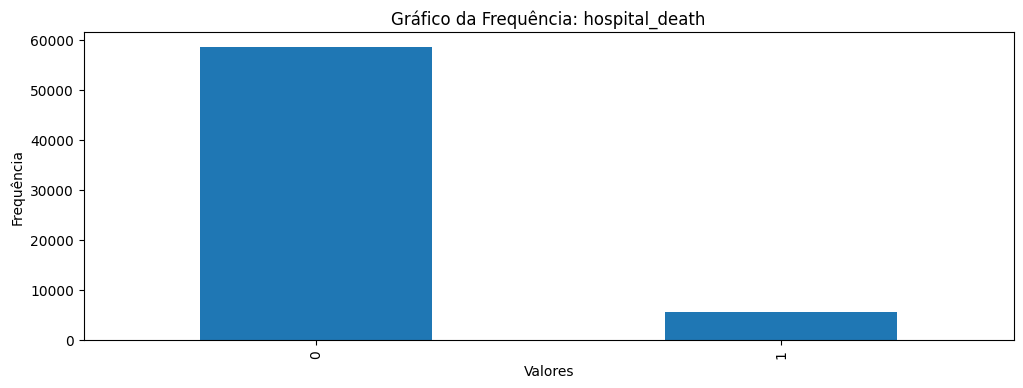

In [28]:
grafico_qualitativa("hospital_death", dados)

* Ao analisarmos as condições de sexo por morte dos pacientes é possivel ver que não existe grande correlação entre estas duas variáveis.  
Os paciente em pequena maioria são homens(apenas 7% maior) e esta maioria não influência nas mortes dos paciente ja que o percentual de mortes por genêro feminino é de 8,81% e por genêro masculino é de 8,47%.

,gender,Frequência
0,M,0.538973
1,F,0.461027


TypeError: QualiQualiAssociation() got an unexpected keyword argument 'mapeamento2'

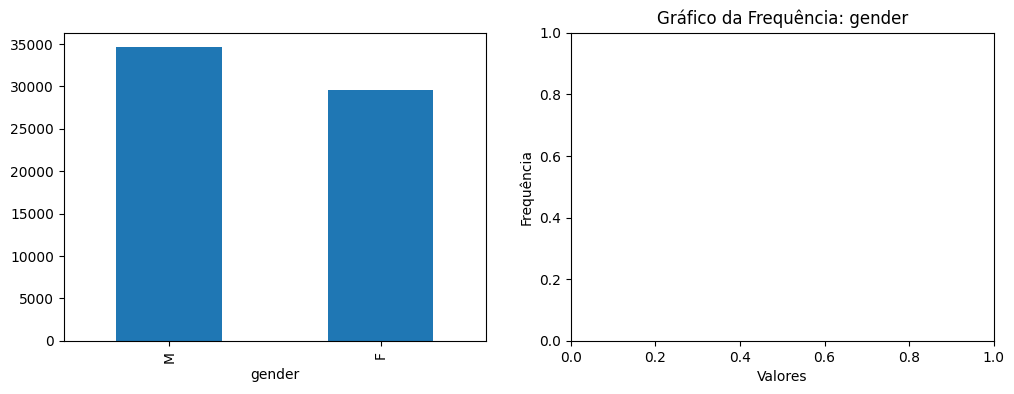

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("gender", dados, axs[0])
QualiQualiAssociation("gender","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Diante do gráficoabaixo dos pacientes diagnosticados com leucemia vemos que somente 0,69% dos pacientes foram diagnosticados com essa condição, porém na análise do gráfico bivariado vemos uma interferência significativa na mortalidade.
Os pacientes que não foram diagnosticados com leucemia tem somente 8.53% na taxa de mortalidade enquanto os pacientes diagnosticados com leucemia tem 18.06% de taxa de mortalidade apresentando assim aproximadamente 10% a mais na taxa de mortalidade.
Assim, pela análise obtida vemos que leucemia é uma variável de maior interesse por impactar na taxa de mortalidade.

,leukemia,Frequência
0,0.0,0.993044
1,1.0,0.006956


******** Conditional Proportion: hospital_death per leukemia ********


hospital_death,0,1
leukemia,,
0.0,0.914664,0.085336
1.0,0.819413,0.180587


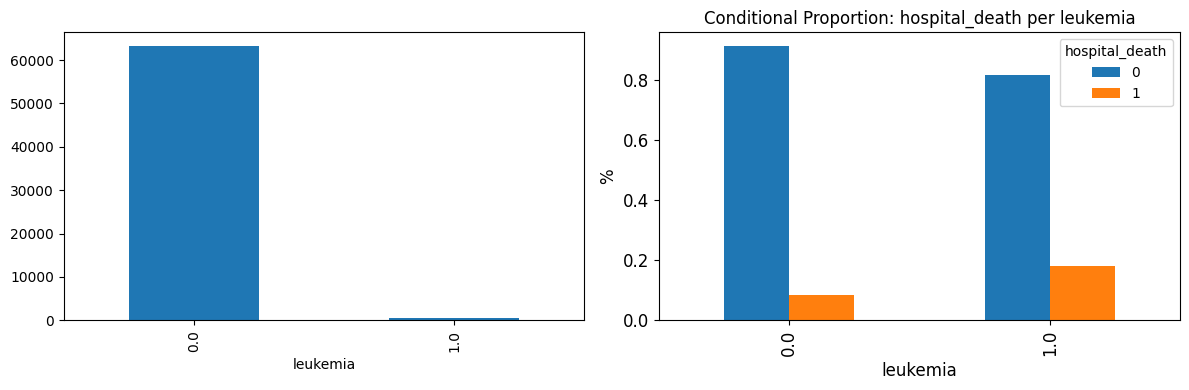

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("leukemia", dados, axs[0])
QualiQualiAssociation("leukemia","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise do gráfico univariado abaixo de pacientes com diabetes vemos que uma quantidade de 22.40% possuem a doença enquanto 77.60% não possuem essa condição.  
Contudo, no gráfico bivariado vemos que a diabetes não tem grande inteferência na taxa de mortalidade. Dos pacientes que morreram 8.83% não possuiam a doença enquanto 7.79% possuiam a doença.
Sendo assim, pela análise obtida vemos que a diabetes não é uma variável de interesse pois mesmo com uma população considerável de diagnosticos positivos de pacientes vemos que ela não interfere na taxa de mortalidade.

,diabetes_mellitus,Frequência
0,0.0,0.775967
1,1.0,0.224033


******** Conditional Proportion: hospital_death per diabetes_mellitus ********


hospital_death,0,1
diabetes_mellitus,,
0.0,0.911653,0.088347
1.0,0.922133,0.077867


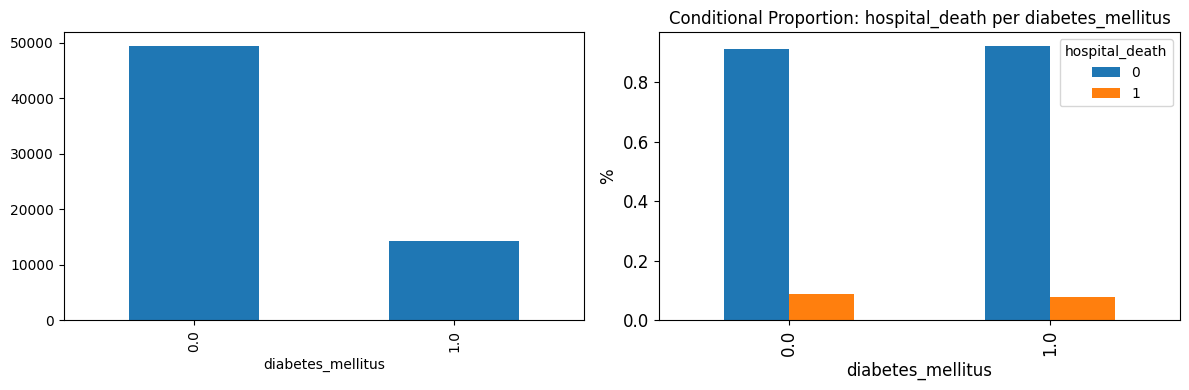

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("diabetes_mellitus", dados, axs[0])
QualiQualiAssociation("diabetes_mellitus","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

Na análise univariada abaixo dos pacientes que possuem ou não tumor sólido com metástase vemos que somente 2.04% possuem a doença enquanto 97,95% não possuem essa condição.
Porém, na análise bivariada vemos que este tumor possui uma grande interferência na taxa de mortalidade.
Os pacientes que não foram diagnosticados com tumor sólido com metástase tem somente 8.40% na taxa de mortalidade enquanto os pacientes diagnosticados com tumor sólido com metástase tem 17.96% de taxa de mortalidade apresentando assim aproximadamente 10% a mais na taxa de mortalidade.
Logo, pela análise obtida podemos ver que tumor sólido com metástase é uma variável de maior interesse por impactar na taxa de mortalidade.

,solid_tumor_with_metastasis,Frequência
0,0.0,0.979541
1,1.0,0.020459


******** Conditional Proportion: hospital_death per solid_tumor_with_metastasis ********


hospital_death,0,1
solid_tumor_with_metastasis,,
0.0,0.915956,0.084044
1.0,0.820414,0.179586


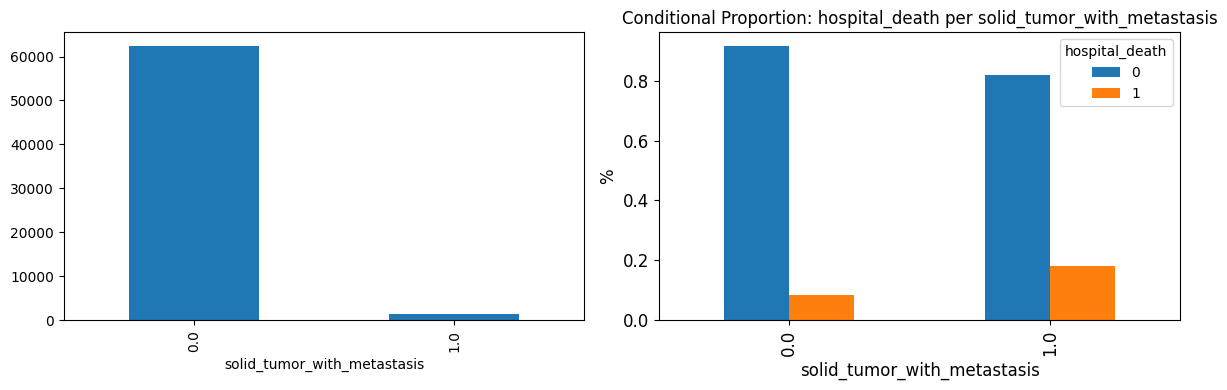

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("solid_tumor_with_metastasis", dados, axs[0])
QualiQualiAssociation("solid_tumor_with_metastasis","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise univariada abaixo de localização do paciente antes de ser admitido na unidade vemos que a grande maioria dos pacientes vem da emergência e que a minoria vem de outras UTI´s e de outris hospital.
Porém, na análise bivariada vemos que na taxa de mortalidade essas porcentagens se alteram.
A localização que possui a maior porcentagem de mortalidade é dos pacientes vindos de outra UTI com 14.28% seguido por os pacientes vindos de outro hospital com 12.59% seguido por floor que possui 13.70%.
Enquanto, a localização que possui a menor porcentagem de mortalidade é dos pacientes vindos sala de operação e recuperação com 03.69% e depois acidente e emergência com 08.60%.
Portanto, podemos ver que os pacientes vindos de outra UTI e de outro hospital são as localizações de maior interesse por ter maior relação com a mortalidade.

,icu_admit_source,Frequência
0,Accident & Emergency,0.590904
1,Operating Room / Recovery,0.203472
2,Floor,0.170516
3,Other Hospital,0.025391
4,Other ICU,0.009717


******** Conditional Proportion: hospital_death per icu_admit_source ********


hospital_death,0,1
icu_admit_source,,
Accident & Emergency,0.914007,0.085993
Floor,0.862984,0.137016
Operating Room / Recovery,0.963054,0.036946
Other Hospital,0.874079,0.125921
Other ICU,0.857143,0.142857


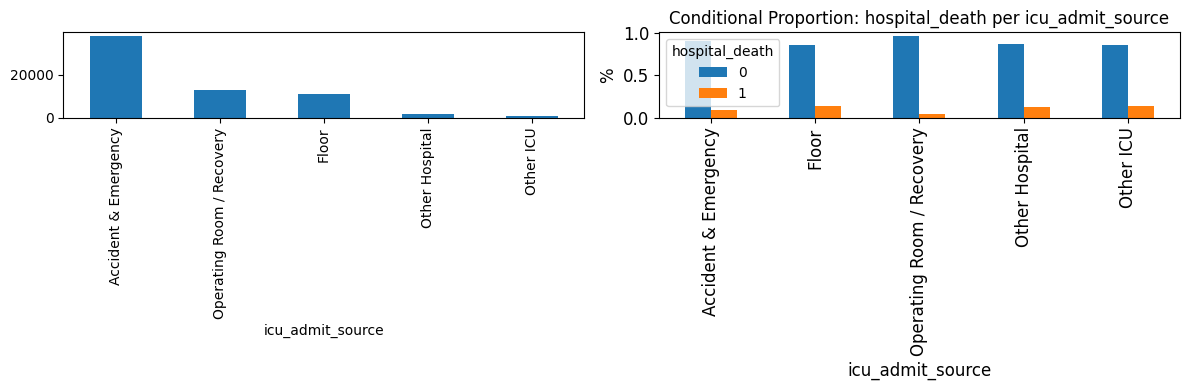

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("icu_admit_source", dados, axs[0])
QualiQualiAssociation("icu_admit_source","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise dos pacientes que possurm falha hepática vemos que somente 1,29% dos pacientes internados possuem essa condição.  
Porém essa condição impacta na taxa de mortalidade, estes que pacientes que possuem falha hepatica tem 10% a mais de contribuição na mortandade do hospital do que aqueles que não possuem essa condição.

,hepatic_failure,Frequência
0,0.0,0.987062
1,1.0,0.012938


******** Conditional Proportion: hospital_death per hepatic_failure ********


hospital_death,0,1
hepatic_failure,,
0.0,0.915324,0.084676
1.0,0.813107,0.186893


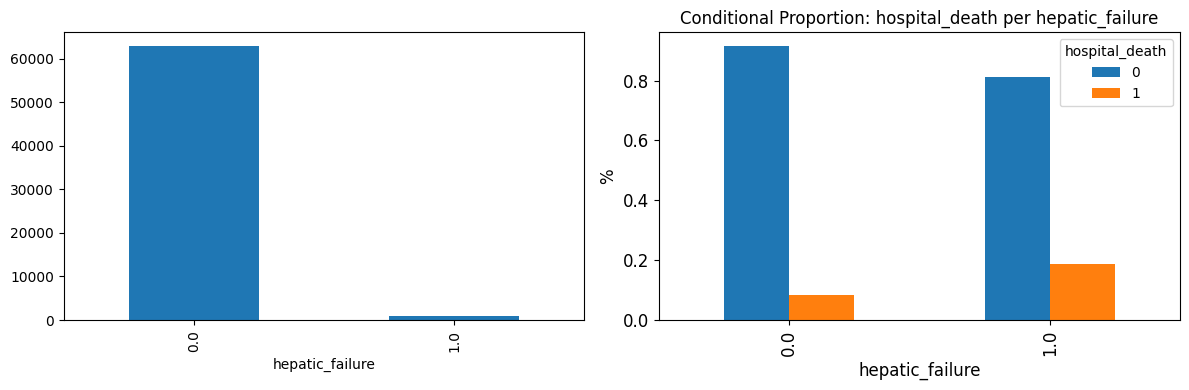

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("hepatic_failure", dados, axs[0])
QualiQualiAssociation("hepatic_failure","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

*Na análise dos pacientes que possuem cirrose vemos que é somente uma pequena porcentagem que possui essa condição.  
Mas vemos no gráfico bivariado que essa condição tem grande impacto nas mortes do hospital sendo 10% maior a taxa de pacientes que morreram e que possuiam cirrose.

,cirrhosis,Frequência
0,0.0,0.984377
1,1.0,0.015623


******** Conditional Proportion: hospital_death per cirrhosis ********


hospital_death,0,1
cirrhosis,,
0.0,0.915539,0.084461
1.0,0.817085,0.182915


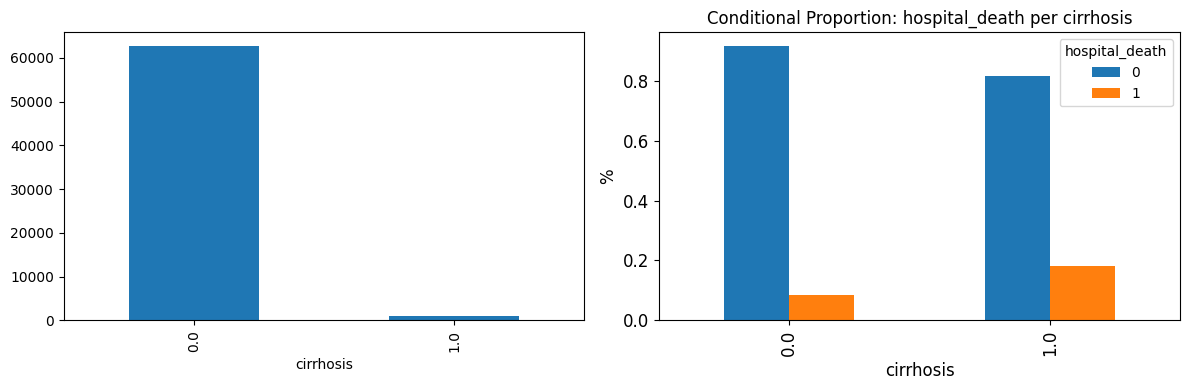

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("cirrhosis", dados, axs[0])
QualiQualiAssociation("cirrhosis","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Ao análisarmos os pacientes que tem imunosupressão vemos que a porcentagem desses pacientes tambem é bem pequena.   
Somente 2.60% dos pacientes possuem essa condição mas ao anarlisarmos o quanto esta condição impacta na morte vemos que este impacto é consideravel.  
Dos pacientes que foram a óbito, 15.62% possuíam imunossupressão, enquanto 8.41% não tinham imunossupressão.

,immunosuppression,Frequência
0,0.0,0.973966
1,1.0,0.026034


******** Conditional Proportion: hospital_death per immunosuppression ********


hospital_death,0,1
immunosuppression,,
0.0,0.915878,0.084122
1.0,0.843788,0.156212


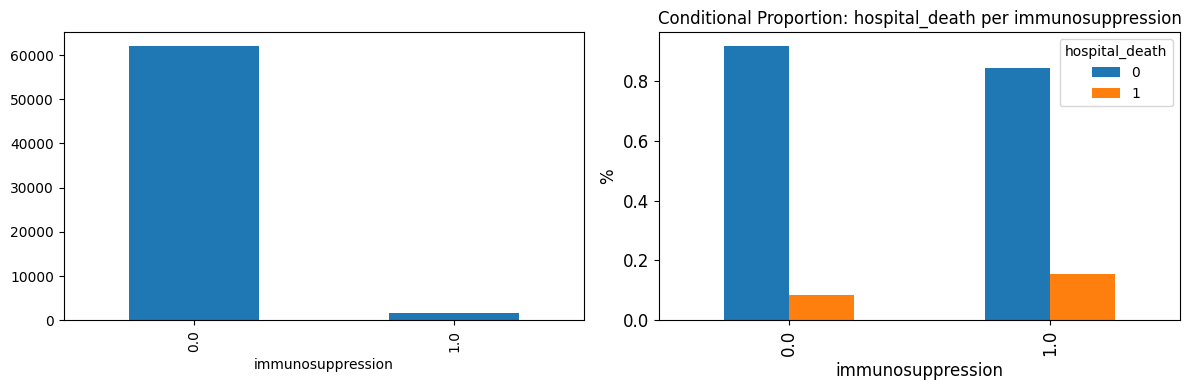

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("immunosuppression", dados, axs[0])
QualiQualiAssociation("immunosuppression","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()


* Já na análise dos pacientes que foram submetidas a ventilação invasiva vemos que tem uma quantidade considerável de pacientes submetidos.  
32.58% dos pacientes receberam ventilação invasiva, enquanto 67,42% não receberam e esta condição tem grande impacto na mortalidade.  
Dos pacientes que morreram 17.67% foram submetidos a ventilação invasiva enquanto  4.22% que não foram submetidas a ventilação invasiva, ou seja, os pacientes que foram submetidos a ventilação invasiva tem aproximadamente 13% a mais na taxa de mortalidade.


,ventilated_apache,Frequência
0,0.0,0.674172
1,1.0,0.325828


******** Conditional Proportion: hospital_death per ventilated_apache ********


hospital_death,0,1
ventilated_apache,,
0.0,0.957844,0.042156
1.0,0.823286,0.176714


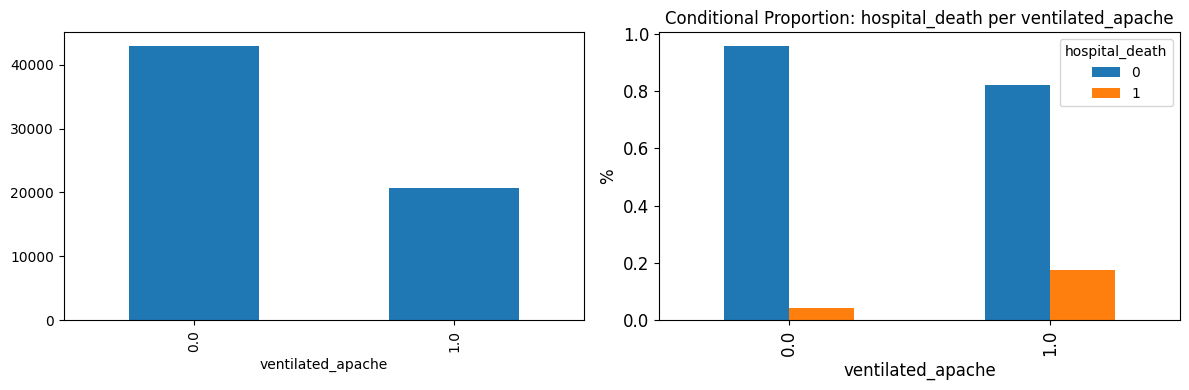

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("ventilated_apache", dados, axs[0])
QualiQualiAssociation("ventilated_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Já na análise dos pacientes que foram intubados vemos que uma porcentagem considerável de 15.18% foram submetidos a esse tratamento.    
No gráfico bivarido vemos que dos pacientes que foram a óbito, 6.57% não estavam em intubação enquanto 19.93% estavam intubados o que mostra que essa condição tem grande impacto na morte.


,intubated_apache,Frequência
0,0.0,0.848164
1,1.0,0.151836


******** Conditional Proportion: hospital_death per intubated_apache ********


hospital_death,0,1
intubated_apache,,
0.0,0.934280,0.065720
1.0,0.800724,0.199276


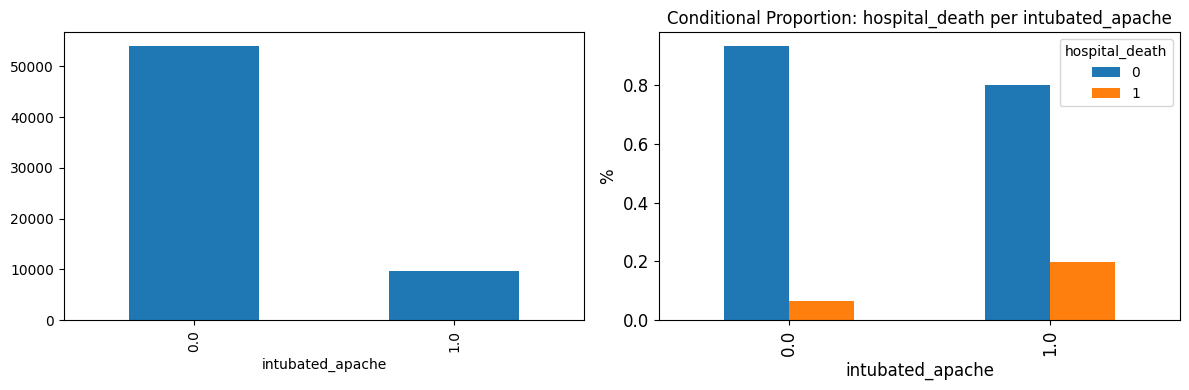

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("intubated_apache", dados, axs[0])
QualiQualiAssociation("intubated_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

### Variáveis Quantitativas

* No gráfico univariado e na distribuição de frequência abaixo de frequência cardíaca há uma grande concentração entre 45 e 60 bpm, mas que a maior concentração encontra-se entre 90 e 130bpm.
O gráfico em boxplot nos mostra que as medidas abaixo de 40 bpm e acima de 170 bpm já são considerados pontos aberrantes.
Os valores esperados podem ser análisados de duas formas.
Apartir das medidas de posição e dispersão vemos que a maioria dos pacientes estão acima dos 60 anos, portanto a frequência cardíaca esperada é entre 45 a 90 bpm.
O Ministério da Saúde estabeleceu valores normais de referência entre 60 e 90 bpm.
Assim, pela análise dessas duas referências podemos perceber que a frequência cardica dos pacientes em geral está bastante elevada e também que não há muitos pacientes que estão dentro do intervalo considerado normal para frequência cardíaca.

,count
"(29.851, 30.585]",390
"(30.585, 31.17]",53
"(31.17, 31.755]",0
"(31.755, 32.34]",81
"(32.34, 32.925]",0
"(32.925, 33.51]",55
"(33.51, 34.095]",79
"(34.095, 34.68]",0
"(34.68, 35.265]",77
"(35.265, 35.85]",0


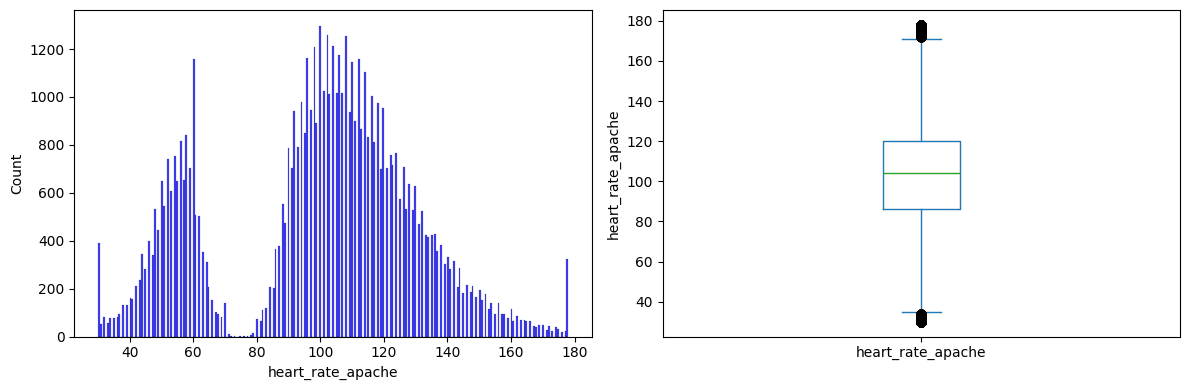

In [ ]:
histograma("heart_rate_apache",dados)

* Análisando o grafico bivariado abaixo de frequência cardiaca das pessoas por morte e por probabilidade de morte obtemos dados interessantes.  
Os pacientes que vieram a obito tiveram uma frequência cardiaca maior e isso é observado tanto no gráfico boxplot(à direita) quanto na tabela.  
Estes pacientes tem uma media mais elevada com aproximadamente 12 pontos a mais daqueles que não vieram a obito.  
 Além disso, no gráfico podemos ver que os pacientes que morreram não possuem pontos aberrantes para cima.  
Nas duas categorias de pacientes observamos que amédia de frequência cardiaca era acima dos valores de referência.  
No gráfico de disperssão(á esquerda) vemos o gráfico quase que inteiramente preenchido a não ser por um buraco entre 65 e 85 de frequência cardiaca.

heart_rate_apache                                            \
                           count        mean        std   min   25%    50%   
hospital_death                                                               
0                        58109.0   98.615739  30.339018  30.0  84.0  103.0   
1                         5465.0  110.411528  34.149646  30.0  96.0  115.0   

                              
                  75%    max  
hospital_death                
0               118.0  178.0  
1               133.0  178.0

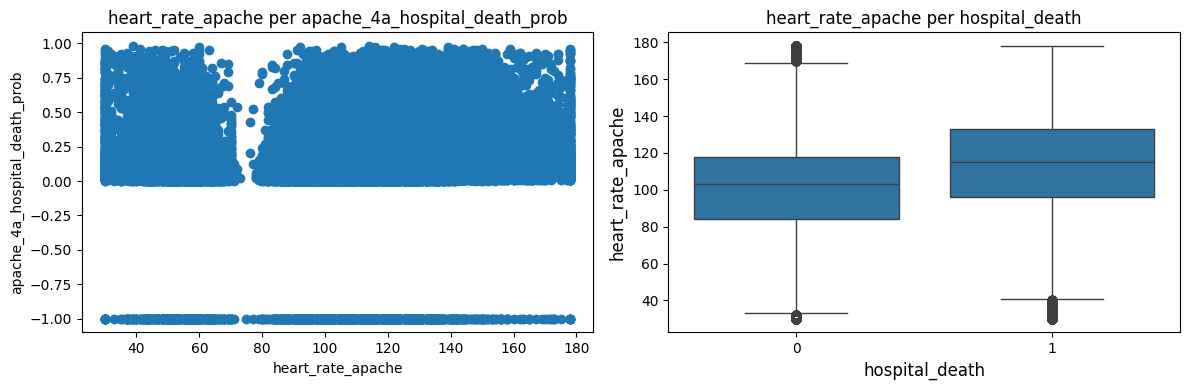

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scater("heart_rate_apache","apache_4a_hospital_death_prob",dados,axs[0])
qualitativaXquantativa("heart_rate_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

--> Análise entre "hospital_death" e "map_apache"
- No histograma e na distribuição de frequência abaixo de pressão arterial percebemos que a maioria dos pacientes estão entre 40 e 80 de pressão arterial e que os outros estão distribuidos ao longo de de 110 a 200;     
- O boxplot não possui pontos aberrantes e o grafico de barras nos mostra que a grande concentração de pessoas esta entre 40 e 60;  

,count
"(39.839000000000006, 40.632]",1302
"(40.632, 41.265]",1041
"(41.265, 41.897]",0
"(41.897, 42.53]",954
"(42.53, 43.162]",964
"(43.162, 43.794]",0
"(43.794, 44.427]",922
"(44.427, 45.059]",938
"(45.059, 45.692]",0
"(45.692, 46.324]",985


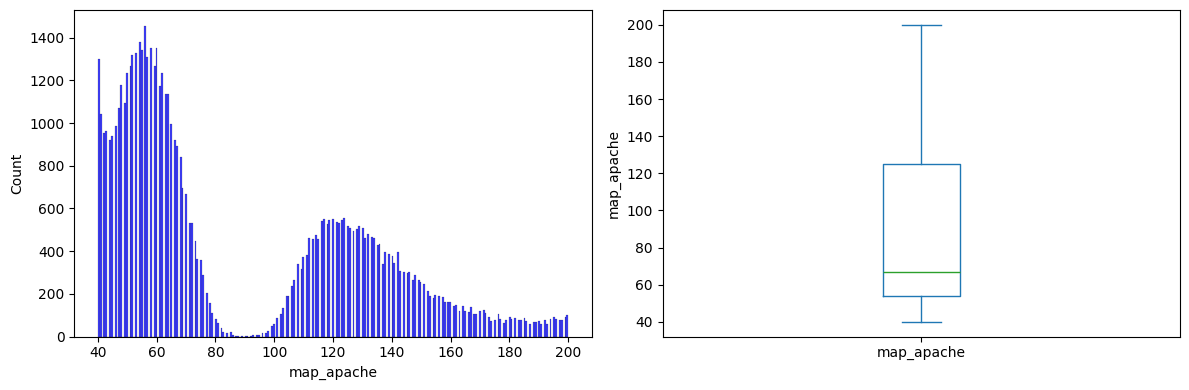

In [ ]:
histograma("map_apache",dados)

* Na análise do gráfico bivariado abaixo de pressão arterial obtemos melhores informações, no gráfico boxplot ainda não há pontos aberrantes no entanto vemos que os pacientes que vieram a obito possuem pressão arterial menos elevada em comparação as pessoas que não vieram a obito.  
Os pacientes que morreram possuem 6 pontos de media menor.  
No gráfico à direita vemos que pacientes que tem pressão arterial entre 75 e 115 possuem uma baixa probabilidade de morte  enquanto valores diferente destes estão preenchendo todo o gráfico.

map_apache                                                 \
                    count       mean        std   min   25%   50%    75%   
hospital_death                                                             
0                 58036.0  88.649648  41.466745  40.0  55.0  67.0  124.0   
1                  5450.0  82.393578  47.850038  40.0  45.0  57.0  128.0   

                       
                  max  
hospital_death         
0               200.0  
1               200.0

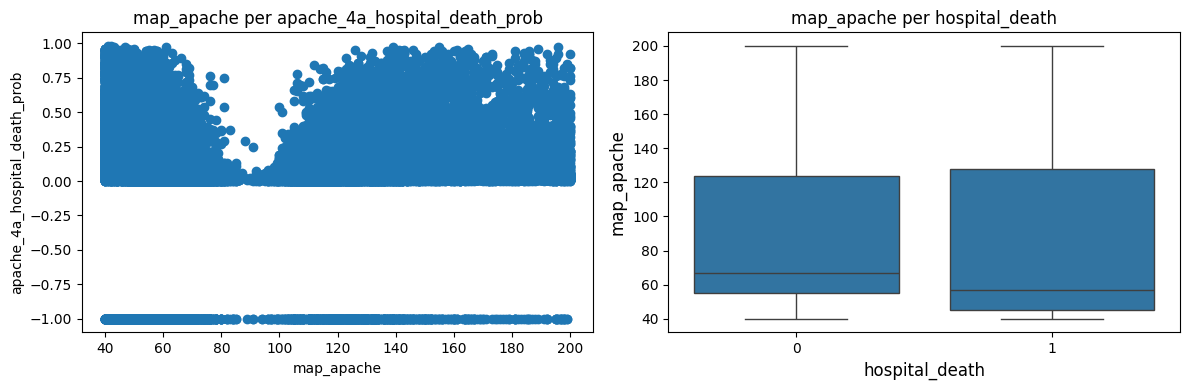

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scater("map_apache","apache_4a_hospital_death_prob",dados,axs[0])
qualitativaXquantativa("map_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

--> Análise entre "hospital_death" e "temp_apache"  
- No histograma e na distribuição de frequência de temperatura percebemos uma grande concentração entre 36 e 37 e vários pontos aberrantes;   
- A temperatura esperada tanto para pacientes idosos quanto pelo ministério da saúde é entre 36,1ºC e 37,2ºC. Portanto, vemos que a maioria dos pacientes estão com temperaturas consideradas normais;   
- Na análise do gráfico bivariado de pressão arterial obtemos melhores informações: no gráfico boxplot ainda não há pontos aberrantes, no entanto, vemos que os pacientes que foram a óbito possuem pressão arterial menos elevada em comparação as pessoas que não morreram;    
- No gráfico à direita vemos que pacientes que tem pressão arterial entre 75 e 115 possuem uma baixa probabilidade de morte, enquanto valores diferentes destes estão preenchendo todo o gráfico.

,count
"(32.091, 32.13]",353
"(32.13, 32.16]",1
"(32.16, 32.19]",0
"(32.19, 32.22]",46
"(32.22, 32.25]",0
"(32.25, 32.28]",0
"(32.28, 32.31]",37
"(32.31, 32.34]",1
"(32.34, 32.37]",0
"(32.37, 32.4]",33


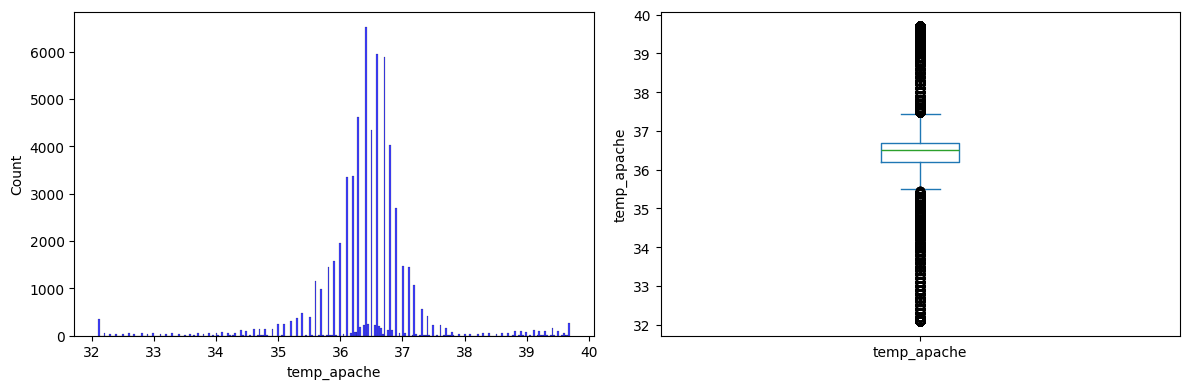

In [ ]:
histograma("temp_apache",dados)

- Na análise do gráfico bivariado abaixo de temperatura percebemos que os pacientes que foram a óbito tem valores de média abaixo do nivel de referência sendo uma temperatura considerada baixa;  
- Percebemos que o boxplot daqueles que morreram é mais cheio e tem pontos aberrantes mais distantes, mo boxplot daqueles que não foram a óbito há maior diversidade de pontos aberrantes;    
- No gráfico de disperssão vemos que pacientes com temperatura elevadas como 38 a 39 possuem menor probabilidade de morrer.

temp_apache                                                  
                     count       mean      std   min   25%   50%   75%   max
hospital_death                                                              
0                  56199.0  36.453325  0.74005  32.1  36.2  36.5  36.7  39.7
1                   5130.0  35.990957  1.44767  32.1  35.6  36.3  36.7  39.7

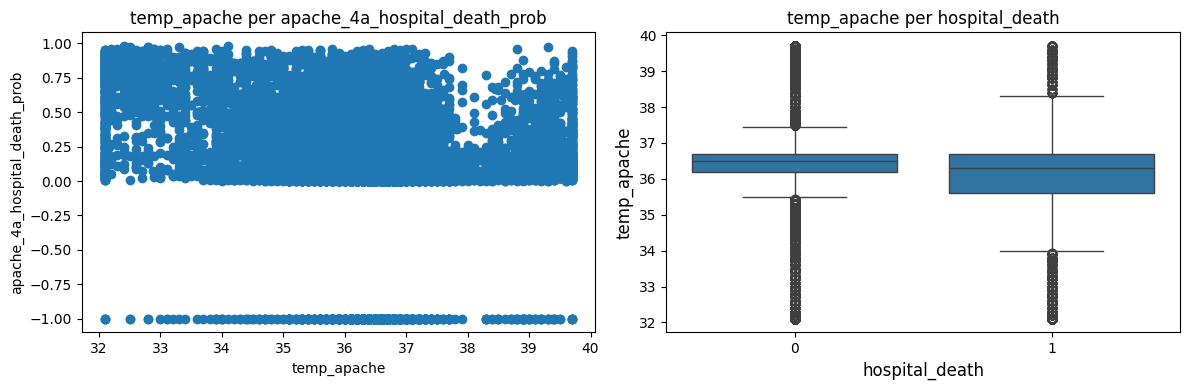

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scater("temp_apache","apache_4a_hospital_death_prob",dados,axs[0])
qualitativaXquantativa("temp_apache","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

--> Análise entre "hospital_death" e "resprate_apache"  
- No histograma e na distribuição de frequência de frequêcia respiratória percebemos dois grandes pontos de concentração entre 5 e 15 e entre 25 e 40;    
- Observamos também que no gráfico boxplot não há pontos aberrantes;   
- A frequência respiratoria considerada normal no nosso grupo de interesse é entre 16 a 25 mrm e pelo ministerio da saude é de entre 16 e 20 mrpm.  
Portanto, pelos gráficos obtidos vemos que a os pacientes que possuem valores considerados normais é bem pequena, e que a maioria doos pacientes estão concetrados em intervalos com valores abaixo do normal ou acima do normal.

,count
"(3.943, 4.221]",2483
"(4.221, 4.443]",0
"(4.443, 4.664]",0
"(4.664, 4.885]",0
"(4.885, 5.107]",1472
"(5.107, 5.328]",0
"(5.328, 5.549]",0
"(5.549, 5.771]",0
"(5.771, 5.992]",1
"(5.992, 6.213]",1468


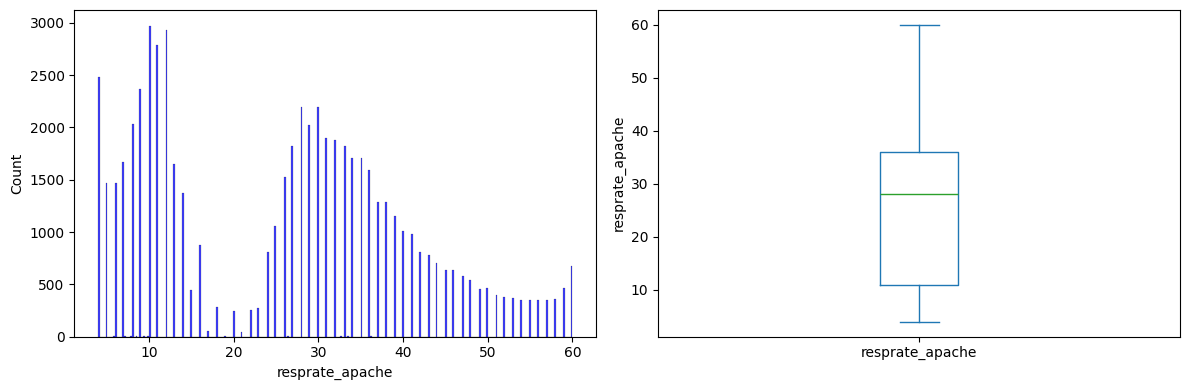

In [ ]:
histograma("resprate_apache",dados)

* No gráfico bivariado abaixo de frequência respiratoria percebemos pela média que a frequência respiratoria media dos pacientes que vieram a obito é bem maior do que a esperada nos dois valores de referência.  
Vemos no gráfico boxplot que o quartil daqueles que morreram esta mais acima daqueles que permaneceram vivos, nos mostrando a alta frequência respiratoria daqueles que morreram.
Não há pontos aberrantes em nenhum dos dois boxplots.  
No gráfico de dispersão tambem observamo um buraco no gráfico, pacientes com valores entre 18 e 24 tem menor probabilidade de morrer enquanto o restante dos valores preenchem o gráfico quase que completamente.


pre_icu_los_days                                           \
                          count      mean       std        min       25%   
hospital_death                                                             
0                       58659.0  0.788503  2.410658 -11.409722  0.035417   
1                        5540.0  1.369714  3.468253 -13.775000  0.036806   

                                                
                     50%       75%         max  
hospital_death                                  
0               0.137500  0.395139  159.090972  
1               0.143056  0.827951   63.827083

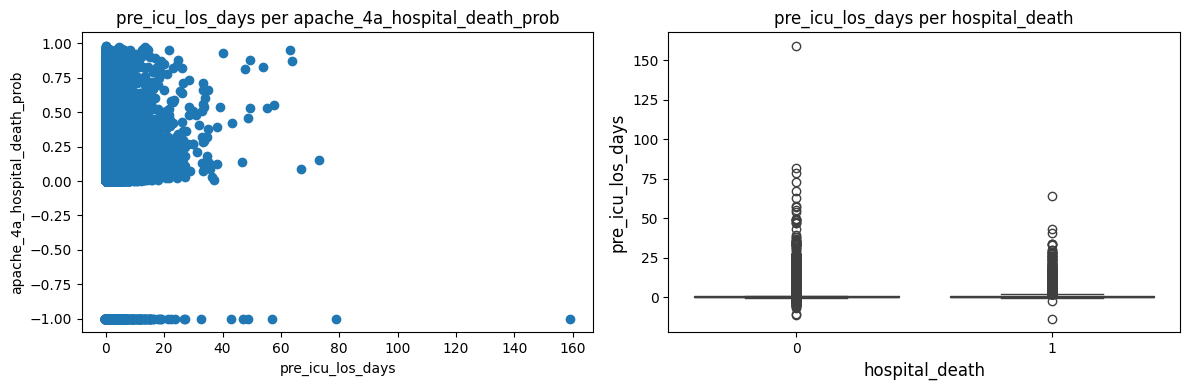

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scater("pre_icu_los_days","apache_4a_hospital_death_prob",dados,axs[0])
qualitativaXquantativa("pre_icu_los_days","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

### Medidas de posição e dispersão

* Breve introdução:  

As medidas de posição permitem inferir sobre o valor que a variável aleatória assumirá, ja as medidas de dispersão permitem medir quão confiáveis são estas inferências.  
As medidas analisadas aqui serão a moda, a media, a mediana, a variancia e o desvio padrão.  
A moda a média e a mediana são medidadas de posição e indicam:  
* moda é o valor que é mais observado na amostra.  
* média é a razão entre a soma dos valores observados e o número de valores observados, representa  o centro de gravidade da amostra.  
* mediana é o valor que se localiza no centro de uma amostra ordenada.   
O desvio padrão e variância sao medidas de dispersão e indicam se os valores estão ou não proximos da média.

Já as variaveis analisadas serão as mesmas variaveis quantitativas analisadas, por terem relação com o diagnostico APACHE-III e fornecerem bons resultados sobre o estado do paciente.   
Como as variáveis de interesse nos fornece valores de referência por faixas etárias é importante analisar as medidas de posição e dispersão por idade.  


In [ ]:
dataframe = dados
varName = "age"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,56119.0,61.727917,16.866711,16.0,52.0,64.0,75.0,89.0
1,5087.0,68.585610,14.445924,16.0,60.0,71.0,80.0,89.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,0,58659,61.727917,67.0,64.0,284.485951,16.866711,73.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,1,5540,68.58561,78.0,71.0,208.684716,14.445924,73.0



Pelos dados obtidos podemos ver que a maioria dos pacientes são idosos portanto consideraremos os valores da tabela correspondente a essa faixa etária e também os valores de referência fornecidos pelo ministério da saúde.   
São eles:  
* Temperatura corporal: entre 35 º C e 36º C.  
* Frequência cardíaca (pulso): entre 60 e 90 bpm.  
* Pressão arterial Sistólica: entre 100 e 140 mmHg e diastólica entre 60 e 90 mmHg.  
* Respiração: entre 16 e 20 mrpm.  


#### heart_rate_apache

* Na análise abaixo das medidas de posição e dispersão da frequência cardíaca vemos uma média e mediana menor para os pacientes que permaneceram vivos e também um desvio padrão e variância menor em relação aqueles que vieram a óbito.  
Porém, os pacientes que não morreram estão com uma moda extramamente maior que aqueles que morreram.

In [ ]:
dataframe = dados
varName = "heart_rate_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,58109.0,98.615739,30.339018,30.0,84.0,103.0,118.0,178.0
1,5465.0,110.411528,34.149646,30.0,96.0,115.0,133.0,178.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,0,58659,98.615739,100.0,103.0,920.455993,30.339018,148.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,1,5540,110.411528,30.0,115.0,1166.198293,34.149646,148.0


#### map_apache

* Na análise abaixo das medidas de posição e dispersão da pressão arterial vemos que aqueles pacientes que permaneceram vivos tem medidas como média, moda e mediana maiores do que aqueles que vieram a óbito, porém com variância e desvio padrão menores.  
Observamos também que das variáveis analisadas são aqueles que possuem maior variância e desvio padrão indicando a grande distância e variabilidade dos dados em ambas as categorias.

In [ ]:
dataframe = dados
varName = "map_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,58036.0,88.649648,41.466745,40.0,55.0,67.0,124.0,200.0
1,5450.0,82.393578,47.850038,40.0,45.0,57.0,128.0,200.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,0,58659,88.649648,56.0,67.0,1719.49095,41.466745,160.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,1,5540,82.393578,40.0,57.0,2289.626129,47.850038,160.0


#### resprate_apache

* Na análise abaixo das medidas de posição e dispersão da frequência respiratória vemos que os dados daqueles que permaneceram vivos tem medidas de média e e mediana menores daqueles que vieram a óbito mas que medidas como moda, variância e desvio padrão são bem maiores o que pode indicar uma grande variabilidade dos dados daqueles que permaneceram vivos.  
Também percebemos que as medidas tanto de variância quanto desvio padrão sao altos em ambas as categorias.

In [ ]:
dataframe = dados
varName = "resprate_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,57856.0,25.421301,15.092625,4.0,11.0,27.0,36.0,60.0
1,5453.0,30.089474,14.698879,4.0,18.0,32.0,39.0,60.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,0,58659,25.421301,10.0,27.0,227.787334,15.092625,56.0


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,1,5540,30.089474,30.0,32.0,216.057035,14.698879,56.0


#### temp_apache

* Na análise abaixo das medidas de posição e dispersão da temeperatura observamos que os pacientes com uma temperatura em torno da considerada normal são aqueles pacientes que permaneceram vivos com moda, mediana e média em torno de 36.5 e com variância e desvio padrão considerados baixos no nosso conjunto de dados, o que indica uma baixa variabilidade.  
Ademais, também percebemos que possuem variância e um desvio padrão menor em relação aos pacientes que vieram a óbito.  
Os pacientes que vieram a óbito tem uma média de temperatura menor que ja pode ser considerada fora do normal mas que possui mediana e moda não tão diferente daqueles que permaneceram vivos.

In [ ]:
dataframe = dados
varName = "temp_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,56199.0,36.453325,0.74005,32.1,36.2,36.5,36.7,39.7
1,5130.0,35.990957,1.44767,32.1,35.6,36.3,36.7,39.7


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,0,58659,36.453325,36.4,36.5,0.547674,0.74005,7.6


,Variavel,Quantidade,Media,Moda,Mediana,Variancia,Desvio padrao,Amplitude
0,1,5540,35.990957,36.4,36.3,2.09575,1.44767,7.6


##  2.3. Transformação de variáveis

* Abaixo separamos as variáveis de acordo com a nossa análise descritiva considerando aquelas que foram submetidas a análise.  
Essas variáveis servirão no nosso modelo de previsão e buscaremos a partir delas prever a variável "hospital_death".   
 Consideramos todas as variáveis anteriormente analisadas mesmo que tenham pouca ou muita relação com nossa variável de interesse pois ao considerarmos mais variáveis temos uma melhora considerável em cada modelo. Quanto mais dados e mais variáveis, melhor.

In [ ]:
quali_var = ['gender',
'icu_admit_source',
'leukemia',
'diabetes_mellitus',
'solid_tumor_with_metastasis',
'cirrhosis',
'hepatic_failure',
'immunosuppression',
'ventilated_apache',
'intubated_apache']
quant_var = ['heart_rate_apache',
'temp_apache',
'resprate_apache',
'map_apache',
'apache_4a_hospital_death_prob']
quanti_Df = dados[quant_var]
quali_Df =dados[quali_var]
treino_dados_y = dados['hospital_death']

* Como possuímos dados faltosos no nosso conjunto, faz-se necessário imputar esses valores faltantes.  
Dessa maneira, faremos o processo de imputação para as variáveis quantitativas. Como critério de imputação, utilizaremos a mediana dos valores de cada variável a ser imputada.

In [ ]:
from sklearn.impute import SimpleImputer
print("-----------------dados quantitativos antes da imputação----------------")
print("\n")
display(quanti_Df)
print("\n")
print("------------------Descrição dos dados antes da imputação--------------------")
display(quanti_Df.describe())
imputer = SimpleImputer(strategy = "median", add_indicator = True)
imputer.fit(quanti_Df)
print('medianas: ', imputer.statistics_)


-----------------dados quantitativos antes da imputação----------------




,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob
0,116.0,36.7,32.0,56.0,0.05
1,129.0,36.7,31.0,54.0,0.11
2,43.0,36.4,27.0,46.0,-1.00
3,139.0,36.9,28.0,178.0,0.09
4,113.0,NaN,41.0,56.0,0.10
...,...,...,...,...,...
64194,104.0,36.8,29.0,73.0,0.01
64195,90.0,36.7,34.0,73.0,0.03
64196,113.0,36.6,6.0,50.0,0.05
64197,83.0,36.0,12.0,63.0,0.09




------------------Descrição dos dados antes da imputação--------------------


,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob
count,63574.000000,61329.000000,63309.000000,63486.000000,58602.000000
mean,99.629739,36.414649,25.823385,88.112592,0.085932
std,30.862527,0.832779,15.115849,42.088844,0.248674
min,30.000000,32.100000,4.000000,40.000000,-1.000000
25%,86.000000,36.200000,11.000000,54.000000,0.020000
50%,104.000000,36.500000,28.000000,67.000000,0.050000
75%,120.000000,36.700000,36.000000,125.000000,0.130000
max,178.000000,39.700000,60.000000,200.000000,0.980000


medianas:  [1.04e+02 3.65e+01 2.80e+01 6.70e+01 5.00e-02]


- Logo abaixo podemos ver os dados após a imputação

In [ ]:
#trocar pra quanti transformados
quanti_Df = pd.DataFrame(imputer.transform(quanti_Df), columns= imputer.get_feature_names_out())
('Nome das colunas: ', imputer.get_feature_names_out())
print("-------------------Apos a imputação pela mediana--------------------")
print("\n")
display(quanti_Df.head())
print("\n")
print("------------------Descrição dos dados apos a imputação--------------------")
display(quanti_Df.describe())


-------------------Apos a imputação pela mediana--------------------




,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
0,116.0,36.7,32.0,56.0,0.05,0.0,0.0,0.0,0.0,0.0
1,129.0,36.7,31.0,54.0,0.11,0.0,0.0,0.0,0.0,0.0
2,43.0,36.4,27.0,46.0,-1.00,0.0,0.0,0.0,0.0,0.0
3,139.0,36.9,28.0,178.0,0.09,0.0,0.0,0.0,0.0,0.0
4,113.0,36.5,41.0,56.0,0.10,0.0,1.0,0.0,0.0,0.0




------------------Descrição dos dados apos a imputação--------------------


,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
count,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000,64199.000000
mean,99.672285,36.418465,25.853560,87.878113,0.082799,0.009735,0.044705,0.013863,0.011106,0.087182
std,30.714926,0.814142,15.012862,41.912909,0.237803,0.098187,0.206656,0.116924,0.104799,0.282104
min,30.000000,32.100000,4.000000,40.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87.000000,36.200000,11.000000,54.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104.000000,36.500000,28.000000,67.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,120.000000,36.700000,36.000000,124.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000
max,178.000000,39.700000,60.000000,200.000000,0.980000,1.000000,1.000000,1.000000,1.000000,1.000000


* Além da imputação, também realizamos a padronização de nossas variáveis quantitativas, ou seja, colocamos os valores das variáveis em uma mesma escala, para que tenham média 0 e desvio padrão de 1.  
Este processo é crucial, pois para muitos modelos de machine learning os dados precisam estar padronizados. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(quanti_Df)
quanti_Df = pd.DataFrame(scaler.transform(quanti_Df), columns= scaler.get_feature_names_out())
print("---------------Dados apos a padronização-----------------")
display(quanti_Df.head())
print("---------------Descrição dos dados apos a padronização-----------------")
display(quanti_Df.describe())

---------------Dados apos a padronização-----------------


,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
0,0.531593,0.345808,0.409415,-0.760586,-0.137928,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
1,0.954843,0.345808,0.342805,-0.808304,0.114384,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
2,-1.845120,-0.022680,0.076364,-0.999178,-4.553382,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
3,1.280421,0.591468,0.142975,2.150235,0.030280,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
4,0.433920,0.100149,1.008905,-0.760586,0.072332,-0.099152,4.622660,-0.118567,-0.105976,-0.309045


---------------Descrição dos dados apos a padronização-----------------


,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
count,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04,6.419900e+04
mean,-2.127234e-16,-6.867912e-15,-5.423230e-18,1.593766e-17,-9.496186e-17,1.914732e-17,9.651136e-17,2.257835e-17,-2.335309e-17,-1.261731e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-2.268370e+00,-5.304353e+00,-1.455667e+00,-1.142333e+00,-4.553382e+00,-9.915172e-02,-2.163256e-01,-1.185666e-01,-1.059756e-01,-3.090448e-01
25%,-4.125806e-01,-2.683396e-01,-9.893966e-01,-8.083041e-01,-2.640838e-01,-9.915172e-02,-2.163256e-01,-1.185666e-01,-1.059756e-01,-3.090448e-01
50%,1.409005e-01,1.001492e-01,1.429745e-01,-4.981347e-01,-1.379279e-01,-9.915172e-02,-2.163256e-01,-1.185666e-01,-1.059756e-01,-3.090448e-01
75%,6.618240e-01,3.458084e-01,6.758551e-01,8.618387e-01,1.564357e-01,-9.915172e-02,-2.163256e-01,-1.185666e-01,-1.059756e-01,-3.090448e-01
max,2.550171e+00,4.030696e+00,2.274497e+00,2.675137e+00,3.772903e+00,1.008555e+01,4.622660e+00,8.434080e+00,9.436137e+00,3.235777e+00


* O processo feito a seguir é denominado One-Hot-Encoding. Destina-se a transformar as características das variáveis qualitativas em colunas (novas variáveis), onde o número 1 representa o valor afirmativo dessa variável e o valor 0 representa valor negativo.  
O One-Hot-Enconding é um passo necessários para aplicarmos modelos de machine learning.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
codificador_qualitativas = OneHotEncoder() 
OHE_quali= codificador_qualitativas.fit_transform(quali_Df)
# (quali_encoder_1hot)

- Dados qualitativos antes do O.H.E

In [ ]:
quali_ohe_df = pd.DataFrame(OHE_quali.toarray(), columns=codificador_qualitativas.get_feature_names_out())
print("-----------------Dados qualitativos antes do OHE-----------------")
quali_Df.head(5)


-----------------Dados qualitativos antes do OHE-----------------


,gender,icu_admit_source,leukemia,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,hepatic_failure,immunosuppression,ventilated_apache,intubated_apache
0,F,Accident & Emergency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,Accident & Emergency,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,M,Accident & Emergency,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,M,Floor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,Accident & Emergency,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


* Dados qualitativos após o one-hot-encoding:

In [ ]:
print("-----------------Dados qualitativos após do OHE-----------------")
quali_ohe_df.head(5)

-----------------Dados qualitativos após do OHE-----------------


,gender_F,gender_M,gender_nan,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_admit_source_nan,leukemia_0.0,...,hepatic_failure_nan,immunosuppression_0.0,immunosuppression_1.0,immunosuppression_nan,ventilated_apache_0.0,ventilated_apache_1.0,ventilated_apache_nan,intubated_apache_0.0,intubated_apache_1.0,intubated_apache_nan
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


* DataFrame após todos os processos (imputação, padronização e one-hot-enconding):

In [ ]:
trainOk = pd.concat([quanti_Df, quali_ohe_df], axis=1)
trainOk.head()

,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob,...,hepatic_failure_nan,immunosuppression_0.0,immunosuppression_1.0,immunosuppression_nan,ventilated_apache_0.0,ventilated_apache_1.0,ventilated_apache_nan,intubated_apache_0.0,intubated_apache_1.0,intubated_apache_nan
0,0.531593,0.345808,0.409415,-0.760586,-0.137928,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.954843,0.345808,0.342805,-0.808304,0.114384,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.845120,-0.022680,0.076364,-0.999178,-4.553382,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.280421,0.591468,0.142975,2.150235,0.030280,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.433920,0.100149,1.008905,-0.760586,0.072332,-0.099152,4.622660,-0.118567,-0.105976,-0.309045,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## 2.4. Partição dos dados em treinamento e teste 

* Nesta etapa faremos uma partição nos dados para aplicarmos aos nossos modelos construídos.  
Essa partição é muito importanteno nosso conjunto de dados, para ajustarmos nossos modelos, construir melhores parametros e tambem para evitar o overfiting.   
Usaremos tambem o sistema de  pipeline, que é uma sequência de etapas que resumem todo o processo de padronização dos dados que fizemos anteriormente.

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler#, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer 
 
quantiPipeline = Pipeline([('imputer', SimpleImputer(strategy = "median", add_indicator = True)), 
                           ('std_scaler', StandardScaler())]) #MinMaxScaler(feature_range  = (.4, .6))
qualiPipeline = Pipeline([('ohe', OneHotEncoder(sparse_output = False)), 
                           ('std_scaler', StandardScaler())]) #MinMaxScaler(feature_range  = (.4, .6))

- Aqui podemos observar como é o dataframe após toda esse processo nos dados

In [ ]:
quantiOk = pd.DataFrame(quantiPipeline.fit_transform(quanti_Df), 
                        columns=quantiPipeline.get_feature_names_out())
quantiOk.head()

,heart_rate_apache,temp_apache,resprate_apache,map_apache,apache_4a_hospital_death_prob,missingindicator_heart_rate_apache,missingindicator_temp_apache,missingindicator_resprate_apache,missingindicator_map_apache,missingindicator_apache_4a_hospital_death_prob
0,0.531593,0.345808,0.409415,-0.760586,-0.137928,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
1,0.954843,0.345808,0.342805,-0.808304,0.114384,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
2,-1.845120,-0.022680,0.076364,-0.999178,-4.553382,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
3,1.280421,0.591468,0.142975,2.150235,0.030280,-0.099152,-0.216326,-0.118567,-0.105976,-0.309045
4,0.433920,0.100149,1.008905,-0.760586,0.072332,-0.099152,4.622660,-0.118567,-0.105976,-0.309045


In [ ]:
from sklearn.compose import ColumnTransformer
fullPipeline = ColumnTransformer([("qt", quantiPipeline, quant_var), 
                                  ("ql", qualiPipeline, quali_var)]) 
fullPipeline

ColumnTransformer(transformers=[('qt',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['heart_rate_apache', 'temp_apache',
                                  'resprate_apache', 'map_apache',
                                  'apache_4a_hospital_death_prob']),
                                ('ql',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(sparse_output=False)),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['gender', 'icu_admit_source', 'leukemia',
                                  'diabetes_mellitus',
                                  'solid_tumor_with_metastasis', 'cirrhosis',
                                  'hepatic_failure', 'immunosuppression',
                                  'ventilated_apache', 'intubated_apache'])])

* Usaremos dois tipos de partições:  
- Primeira partição: dividir nosso conjunto de dados igualmente, ou seja, dividiremos o dataframe para termos 50% de dados com pacientes que foram a óbito e 50% dos pacientes que permaceram vivos.  

In [ ]:
df_0 = dados[dados['hospital_death'] == 0] 
df_1 = dados[dados['hospital_death']== 1] 

df_0_subsampled = df_0.sample(n=len(df_1), random_state=42) 

df_balanced = pd.concat([df_0_subsampled, df_1])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_val_index, test_index in split.split(df_balanced,df_balanced["hospital_death"]):
    train_val_set = df_balanced.loc[train_val_index]
    test_set = df_balanced.loc[test_index]



dados_treino_balanced = train_val_set
dados_teste_balanced = test_set

y_train_balanced = dados_treino_balanced['hospital_death']
y_test_balanced = dados_teste_balanced['hospital_death']

x_teste_balanced = fullPipeline.fit_transform(dados_teste_balanced)
x_train_balanced = fullPipeline.fit_transform(dados_treino_balanced)

- Segunda partição: utilizaremos todo o nosso conjunto de dados:

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_val_index, test_index in split.split(dados,dados["hospital_death"]):
    train_val_set = dados.loc[train_val_index]
    test_set = dados.loc[test_index]


# Resultados
dados_treino = train_val_set
dados_teste = test_set

y_train = dados_treino['hospital_death']
y_teste = dados_teste['hospital_death']
#y_val_balanced = dados_validacao_balanced['hospital_death']


#x_val_balanced = fullPipeline.fit_transform(dados_validacao_balanced)
x_teste= fullPipeline.fit_transform(dados_teste)
x_train = fullPipeline.fit_transform(dados_treino)

# 3. Modelagem

## 3.1. Modelos manualmente definidos

- Nesta etapa aplicaremos dois tipos de modelo: os modelos balanceados e os modelos não balanceados.   
- Nos modelos balanceados, os dados foram previamente repartidos para terem 50% de dados referente a pacientes que sobreviveram e 50% de pacientes que foram a óbito;   
- Nos modelos não balanceados, os modelos foram construídos considerando todo o conjunto de dados, sem partição;    
O intuito desta metodologia é para uma análise prévia do desempenho dos modelos, uma vez que dados não balanceados prejudicam na performance dos modelos e na geração de boas previsões, sendo vítima do Paradoxo da Acurácia, em que os parâmetros dos modelos não irão levar em consideração a classe minoritária do nosso dataset.   


## 3.1.2 Modelos balanceados

### Logistic Regression

* Abaixo veremos o modelo de regressão logistica e suas configurações.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',C=1.5,solver='saga') 
log_reg.fit(x_train_balanced, y_train_balanced)
y_pred = [y_p for y_p in log_reg.predict(x_train_balanced)]
y_train_predictions = [round(y_hat) for y_hat in y_pred]

c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1.5, penalty='l1', solver='saga')

- O modelo rotula muitos pacientes vivos e isso faz com que o modelo erre.  
Ele não consgue classificar corretamente os valores que deveriam ser de morte e por isso perde desempenho tanto no conjunto de treino quanto no de teste.    
Veja que modelo nos valores de teste seguiu da mesma forma que no treinamento

* O modelo de regressão logistica tem um bom desempenho nos dados de treinamento e desempenho semelhante nos dados de teste.   
O modelo consegue classifcar bem tanto pacientes que sobreviveram quanto pacientes que morreram, porém classifica um numero considerável de pacientes de maneira errada, classificando como paciente sobrevivente enquanto nos daods orignais o paciente foi a obito.   
Isto ocorre tanto nos dados de treinamento quanto nos dados de teste.  

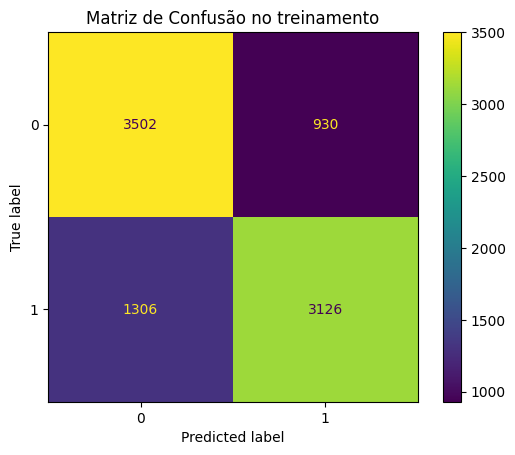

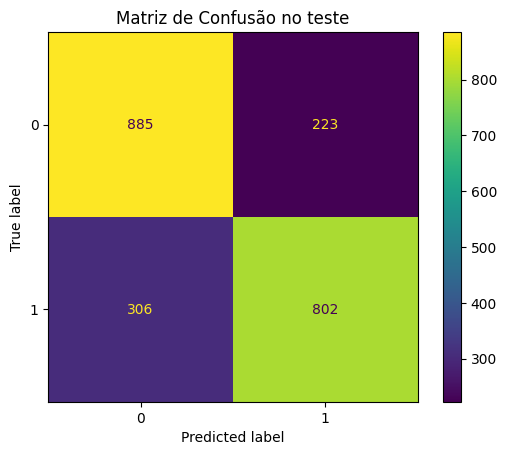

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

ConfusionMatrixDisplay.from_predictions(y_train_balanced, y_train_predictions)
plt.title('Matriz de Confusão no treinamento')
plt.show()


y_test_predictions = [round(y_hat) for y_hat in log_reg.predict(x_teste_balanced)]
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_test_predictions)
plt.title('Matriz de Confusão no teste')
plt.show()

### Decision Tree

* Ja  o modelo de arvore de decisão se saiu bem melhor categorizando melhor os valores.  

In [ ]:


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_reg = DecisionTreeClassifier(criterion='entropy',random_state=0, min_samples_split = 5) 
tree_reg.fit(x_train_balanced, y_train_balanced)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=0)

* Logo abaixo podemos ver o desempenho do modelo nos dados de teste e de treino, Veja que o modelo possui um desempenho muito  categorizando os valores tanto de pacientes vivos quanto aqueles que foram a obitos corretamente.   
Nos dados de teste o modelo perde um pouco de desempenho não sendo considerado tão bom, mas que ainda conseue categorizar bem os valores tendo dificuldade por acabar prevendo casos de paciente que sobreviveram quando deveriam ser previstos como pacientes que morreram. 

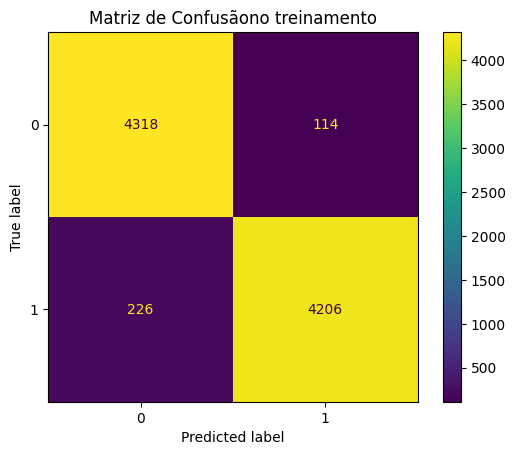

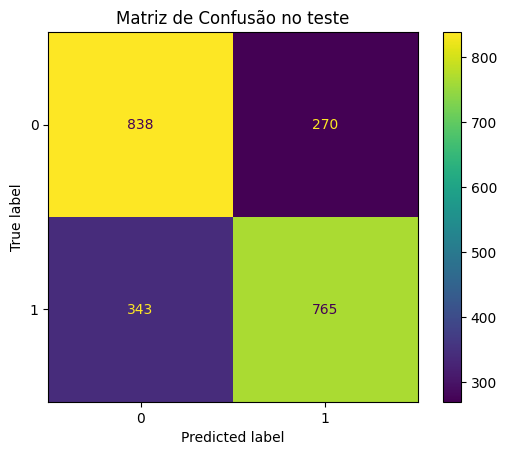

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

ConfusionMatrixDisplay.from_predictions(y_train_balanced, y_train_predictions)
plt.title('Matriz de Confusãono treinamento')
plt.show()


y_test_predictions = [round(y_hat) for y_hat in tree_reg.predict(x_teste_balanced)]
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_test_predictions)
plt.title('Matriz de Confusão no teste')
plt.show()


### Random forest Classifier

* O modelo de floresta se mostra um pouco pior em relação aos vistos anteriormente.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier(random_state=0, min_samples_split = 20, 
                     n_estimators=150,criterion= 'entropy',max_features= 'log2') 

forest_reg.fit(x_train_balanced, y_train_balanced)
y_train_predictions = [round(y_hat) for y_hat in tree_reg.predict(x_train_balanced)]

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=20, n_estimators=150, random_state=0)

* Na matriz de confusão e na acuracia de 85% do modelo conseguimos perceber que este modelo erra mais em comparação aos outros modelos, nos dados de treino obtivemos maiores erros em relação aos modelos vistos anteriormente .   
Houve nos dados de treino um aumento de 300 pacientes que foram classificados de forma errada.  
Porém, nos dados de teste o modelo se mostra melhor que os antecessores ao acertar de forma melhor valores de obito.

* O modelo de floresta de classificação foi o modelo com melhor desempenho prevendo corretamente os casos de pacientes vivos e mortos tanto nos dados de treinamento quanto nos dados de teste.  
O modelo não parece ter mais dificuldade em prever um caso que outro tendo os numeros do erros nas matrizes de confusão bem semelhantes.  
Este modelo pode ser considerado extremamente bom por ter um desempenho bom nos dois conjuntos o que indica que o modelo realmente conseguiu aprender nos dados de treinamento.

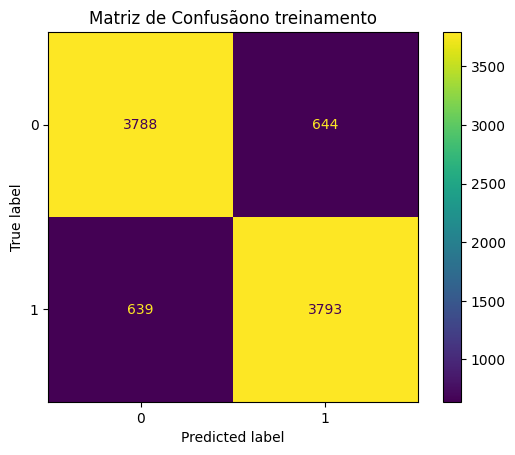

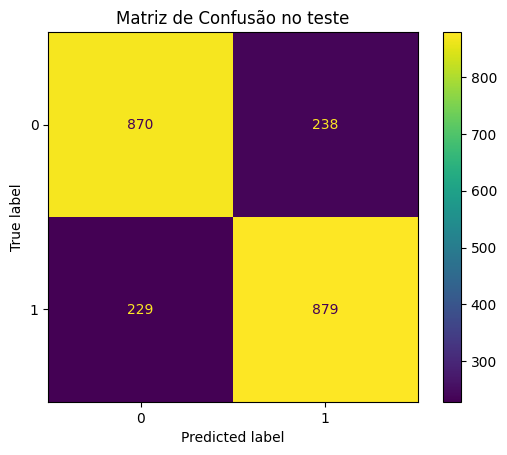

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

ConfusionMatrixDisplay.from_predictions(y_train_balanced, y_train_predictions)
plt.title('Matriz de Confusãono treinamento')
plt.show()


y_test_predictions = [round(y_hat) for y_hat in forest_reg.predict(x_teste_balanced)]
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_test_predictions)
plt.title('Matriz de Confusão no teste')
plt.show()

### XGBoost Regression

Ja o modelo de xgboost se mostra muito bom, porém isso so ocorre nos dados de treinamento do modelo, nos dados de teste o modelo tem um pouco pior desempenho em relação aos anteriores.

In [ ]:
import xgboost as xg
xgb_reg = xg.XGBRegressor(objective ='binary:logistic', n_estimators = 100,
                            seed = 0, max_depth = x_train_balanced.shape[1])
xgb_reg.fit(x_train_balanced, y_train_balanced)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=43, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='binary:logistic', ...)

* Na matriz de confusão dos dados de treinamento observamos que o modelo praticamente não erra, isso indica  que o modelo esta decorando os dados de treinamento e por isso consegue categorizar tão bem.  
Já nos dados de teste vemos os erros do modelo e acontece ao contrario do que viemos observando até agora, o nosso modelo categoriza mais valores como mortos e por isso perde um pouco de desempenho.  
Mas em geral nos dados de teste esse modelo obteve um desempenho interessante.


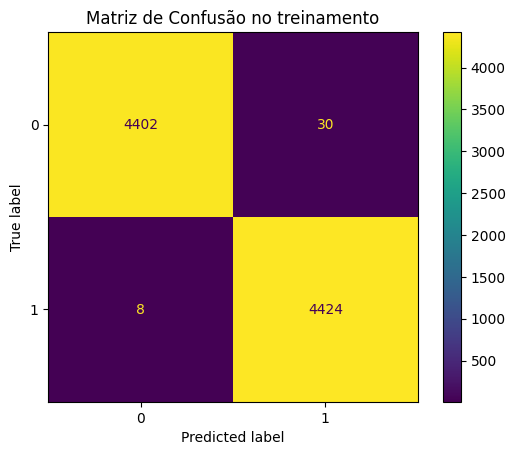

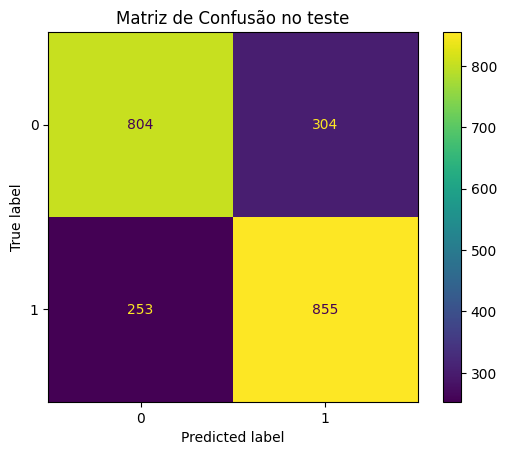

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

ConfusionMatrixDisplay.from_predictions(y_train_balanced, y_train_predictions)
plt.title('Matriz de Confusão no treinamento')
plt.show()


y_test_predictions = [round(y_hat) for y_hat in xgb_reg.predict(x_teste_balanced)]
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_test_predictions)
plt.title('Matriz de Confusão no teste')
plt.show()


### ANN

* O modelo ANN acontece alguns erros na classificação pois ele cria valores diferentes de 0 e 1.

In [ ]:
from sklearn.neural_network import MLPRegressor
ann_reg = MLPRegressor(random_state=0, hidden_layer_sizes=(200),learning_rate_init=0.05,learning_rate='constant',
                       activation='relu', max_iter=1000)
ann_reg.fit(x_train_balanced, y_train_balanced)#.values.ravel())ctions)

MLPRegressor(hidden_layer_sizes=200, learning_rate_init=0.05, max_iter=1000,
             random_state=0)

* Conforme dito anteriorente o modelo criou um novo valor diferente de 0 e 1 porém isso so ocorreu nos dados de treinamento.  
Nos dados de treinamento vemos um pior desempenho, é o modelo que mais rotula de forma errada categorizando muitos pacientes como vivos.  
Já nos dados de teste o nosso modelo se saiu bem melhor conseguindo prever a maioria dos valores corretamente e prevendo somente alguns casos de forma errada.

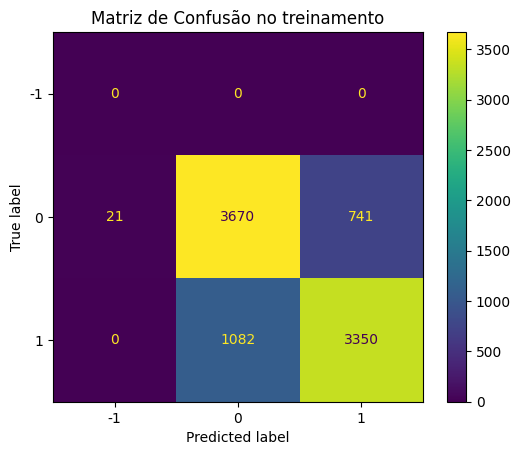

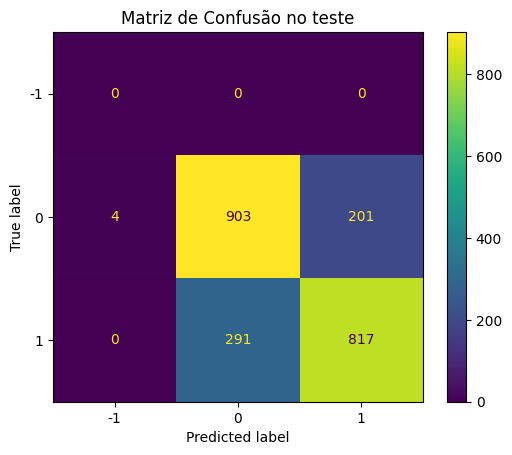

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification


ConfusionMatrixDisplay.from_predictions(y_train_balanced, y_train_predictions)
plt.title('Matriz de Confusão no treinamento')
plt.show()

y_test_predictions = [round(y_hat) for y_hat in ann_reg.predict(x_teste_balanced)]
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_test_predictions)
plt.title('Matriz de Confusão no teste')
plt.show()

## 3.1.3 Modelos normais

* Nos modelos normais faremos os modelos de previsão usando os dados do cojunto orignal, ou seja, com uma grande quantidade de paciente que permanceram vivos e poucos que vieram a obito.

### Logistic Regression

* Logo abaixo segue o modelo de regressão logistica, o modelo não se saiu tão bem mesmo sendo um bom modelo para classificação binairia.  

In [ ]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',C=1.5,solver='saga',class_weight={0: 1, 1: 3}) 
log_reg.fit(x_train, y_train)#.values.ravel())
y_pred = [y_p for y_p in log_reg.predict(x_train)]

c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1.5, class_weight={0: 1, 1: 3}, penalty='l1',
                   solver='saga')

* O modelo de regressão logisitca não entregou bons resultados confomre dito anteriormente.   
Como os dados não estão balanceados o modelo so consegue prever os dados que são maioria no conjunto, ou seja, aqueles pacientes que permanceram vivos e não consegue prever a minoria do conjunto.  
Nas matrizes de confusão tanto para treino quanto para teste o modelo erra mais do que acerta os casos em que tenta classifcar o paciente como morto.

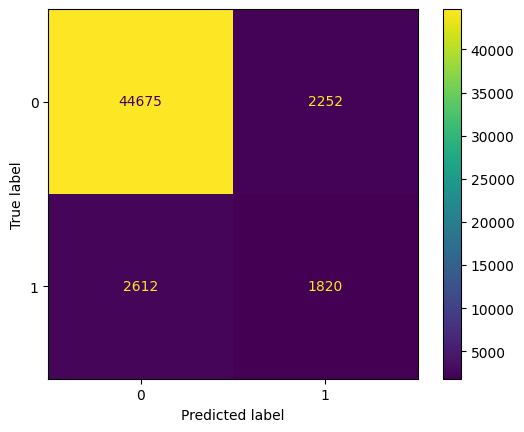

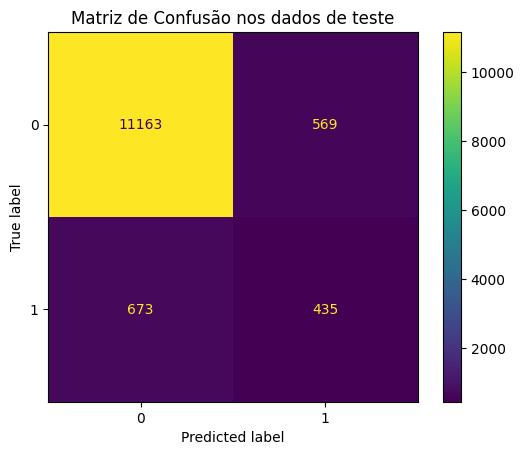

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# Visualização da matriz de confusão usando ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
plt.show()




y_teste_prediction =  [round(y_hat) for y_hat in log_reg.predict(x_teste)]
y_teste_prediction = [round(y_hat) for y_hat in y_teste_prediction]
ConfusionMatrixDisplay.from_predictions(y_teste, y_teste_prediction)
plt.title('Matriz de Confusão nos dados de teste')
plt.show()

### Decision Tree

* Já o modelo de arvore de decisão se saiu melhor.

In [ ]:
#Concept

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_reg = DecisionTreeClassifier(criterion='entropy',random_state=0, min_samples_split = 5) 
tree_reg.fit(x_train, y_train)
y_train_predictions = [round(y_hat) for y_hat in tree_reg.predict(x_train)]

DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=0)

* Nos dados de treinamento conseguimos prever mais valores corretamente tanto para pacientes que permaneceram vivos quanto para aqueles que morreram e erramos bem menos que no modelo de regressão logistica, conseguindo classifcar de forma melhor nossa variável.    
Porém nos dados de teste acabamos por ver o contrário, o modelo erra muitos valores na classificação e não conseguimos prever corretamente valores de pacientes que morreram nos dados de teste tendo um desempenho totalmente diferente dos dados de treinamento.

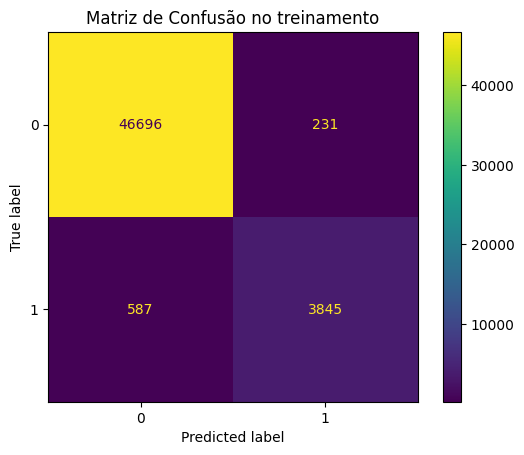

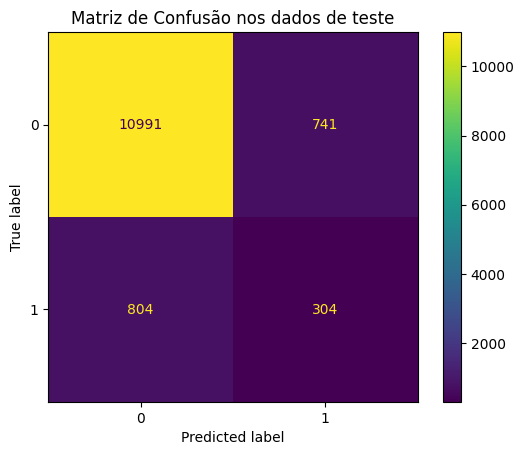

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification


ConfusionMatrixDisplay.from_predictions(y_train, y_train_predictions)
plt.title('Matriz de Confusão no treinamento')
plt.show()

y_teste_prediction =  [round(y_hat) for y_hat in tree_reg.predict(x_teste)]
ConfusionMatrixDisplay.from_predictions(y_teste, y_teste_prediction)
plt.title('Matriz de Confusão nos dados de teste')
plt.show()



### Random Forest Classifier

* O modelo de  Randon Forest teve um desempenho semelhante ao modelo de Decision Tree.  
No modelo de  floresta de classificação tambem foi usado pesos nas variáveis para ter uma melhor categorização de pacientes mortos.    

In [ ]:
class_weights = {0: 1, 1: 3}
from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier(random_state=0, min_samples_split = 20, 
                     n_estimators=200,criterion= 'entropy',class_weight= class_weights,max_features= 'log2') 

forest_reg.fit(x_train, y_train)
y_pred = [y_p for y_p in forest_reg.predict(x_train)]
y_train_predictions = [round(y_hat) for y_hat in forest_reg.predict(x_train)]


RandomForestClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       max_features='log2', min_samples_split=20,
                       n_estimators=200, random_state=0)

* No modelo de Floresta de classifição vemos que ele não teve um desempenho muito diferente do modelo de arvore de decisão, o modelo de floresta também conseguiu categorizar alguns valores corretamente tanto para obito quanto para aqueles que permaneceram vivos.  
Porém, o modelo de arvore de decisão tem um desempenho melhor que o modelo de floresta pois erra menos na classificação tanto de valores de obito quanto de pacientes que permaceram vivos.  
O que se vê no modelo de floresta de decisão é que este modelo preve muitos pacientes como vivos quando deveriam ser classificados como obito.  
Nos dados de teste o modelo perde ainda mais desempenho como visto na matriz de confusão.

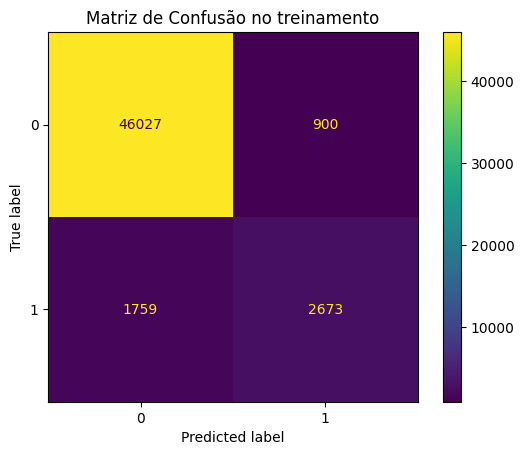

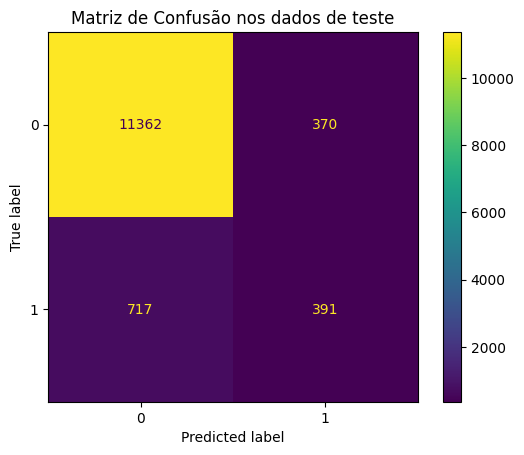

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

ConfusionMatrixDisplay.from_predictions(y_train,y_train_predictions)
plt.title('Matriz de Confusão no treinamento')
plt.show()



y_teste_prediction =  [round(y_hat) for y_hat in forest_reg.predict(x_teste)]
ConfusionMatrixDisplay.from_predictions(y_teste, y_teste_prediction)
plt.title('Matriz de Confusão nos dados de teste')
plt.show()


### XGBoost Regression

* A seguir veremos o modelo de XGBoost

In [ ]:
import xgboost as xg
xgb_reg = xg.XGBRegressor(objective ='binary:logistic', n_estimators = 100,
                            seed = 0, max_depth = x_train.shape[1])
xgb_reg.fit(x_train, y_train)
y_pred = [y_p for y_p in xgb_reg.predict(x_train)]
y_train_predictions = [round(y_hat) for y_hat in xgb_reg.predict(x_train)]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=43, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='binary:logistic', ...)

 * Já o modelo xgboostmostra grande desempnho nos dados de treinamento, errando menos de 60 casos e prevendo corretamente paciente que morreram e que sobreviveram, porém esse desempenho so é visto nos dados de treinamento.  
Nos dados de teste o modelo xgboost segue  o mesmo desempenho do modelos anteriores, não conseguindo classifcar corretamente os dados de pacientes mortos e classifcando muitos pacientes como vivos.

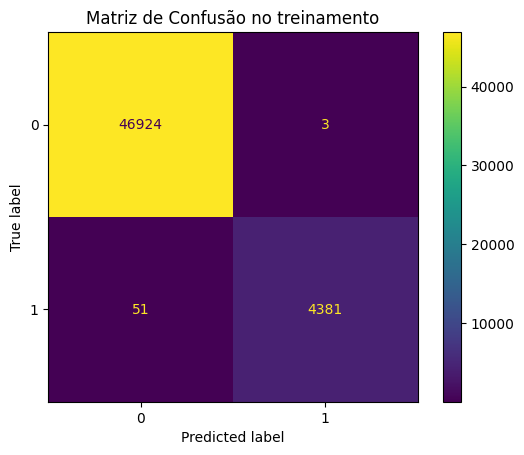

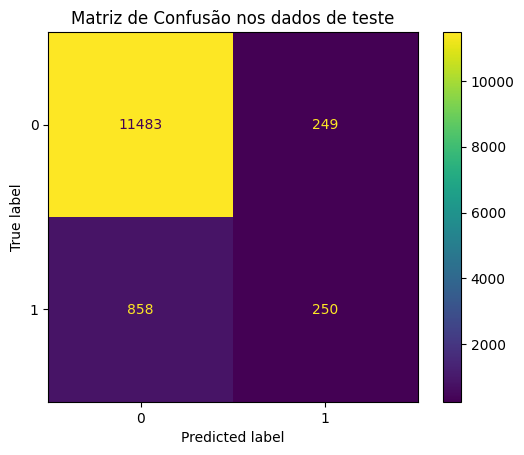

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification


ConfusionMatrixDisplay.from_predictions(y_train, y_train_predictions)
plt.title('Matriz de Confusão no treinamento')
plt.show()




y_teste_prediction =  [round(y_hat) for y_hat in xgb_reg.predict(x_teste)]
ConfusionMatrixDisplay.from_predictions(y_teste, y_teste_prediction)
plt.title('Matriz de Confusão nos dados de teste')
plt.show()

## 3.2. Modelos otimamente definidos

* As funções abaixo nos ajudarão a ver como os modelos otimamente definidos atuam.

In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

models_label = []
models_accuracy = []
models_mean_rmse = []
models_std_rmse = []
def computeAccuracyAndRmseScores(models): 
    for model in models:
        mse_scores = - cross_val_score(model, x_train_balanced, y_train_balanced.values.ravel(), 
                                        scoring ="neg_mean_squared_error", cv = 3, 
                                        verbose = 0, n_jobs=3)#cv) 
        rmse_scores = np.sqrt(mse_scores)
        formalism = type(model).__name__
        models_label.append(formalism)
        y_pred = []
        try:
            y_pred = [round(y_hat) for y_hat in model.predict(x_train_balanced)]
        except:
            y_pred = [round(y_hat[0]) for y_hat in model.predict(x_train_balanced)]
        models_accuracy.append(accuracy_score(y_true = y_train_balanced.values.ravel(), y_pred= y_pred))
        models_mean_rmse.append(rmse_scores.mean())
        models_std_rmse.append(rmse_scores.std())
        print(formalism, " ok ")
    df = pd.DataFrame({'model': models_label, 
                       'train_accuracy': models_accuracy, 
                       'cv_rmse_mean': models_mean_rmse, 
                       'cv_rmse_std': models_std_rmse})
    print(" --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- ") 
    print(df.sort_values(by="train_accuracy", ascending = False))
    # print(" RMSE Mean:", rmse_scores.mean()) 
    # print(" RMSE Standard deviation:", rmse_scores.std())
from skopt import BayesSearchCV
from skopt.plots import plot_objective
def getOptimalModelViaBayesSearchCv(modelObj, parsDists, x_train, y_train, verbose=False, 
                                    epochs=150, batch_size=32,validation_split=.2, callbacks=[]):
    opt = BayesSearchCV(modelObj, parsDists, n_iter=32,  cv=3, return_train_score = True, 
                        scoring = 'neg_mean_squared_error', verbose=verbose, n_jobs = 3)
    if(type(modelObj).__name__!='KerasRegressor'):
        opt.fit(X = x_train, y = y_train.values.ravel())
    else:
        opt.fit(X = x_train, y = y_train,  
                epochs=epochs, batch_size=batch_size,
                validation_split=validation_split, callbacks = callbacks)
    parNames = [name for name, value in parsDists.items()]
    _ = plot_objective(opt.optimizer_results_[0],
                    dimensions=parNames,
                    n_minimum_search=int(1e8))
    plt.show()
    print('best_params = ', opt.best_params_)
    print('best_score (RMSE)= ', np.sqrt(-opt.best_score_))
    model = opt.best_estimator_
    return (model)

* A partir daqui consideraremos somente os dados balanceados.  
Consideraremos esses modelos pois conforme observado o seu desempenho é muito melhor em relação ao conjunto de dados original.   
Por isso ao otimizar esses modelos teremos uma melhor classificação.

* __Grid Search Cross Validation__:  
O Grid Search é uma técnica poderosa para ajustar os hiperparâmetros de modelos de aprendizado de máquina.  
Ele realiza uma busca exaustiva em um conjunto pré-definido de valores de hiperparâmetros para encontrar a combinação que resulta no melhor desempenho do modelo.  
O Grid Search avalia o modelo em todas as combinações possíveis de hiperparâmetros, o que pode ser computacionalmente caro.   
É útil quando você tem uma ideia clara dos valores que deseja testar para cada hiperparâmetro.  


* __Randomized Search Cross Validation__:  
O Randomized Search também otimiza hiperparâmetros, mas de forma mais eficiente.  
Em vez de testar todas as combinações possíveis, ele amostra um número fixo de configurações de hiperparâmetros a partir de distribuições especificadas.  
Isso economiza tempo de computação e ainda permite encontrar boas combinações de hiperparâmetros.  
É especialmente útil quando o espaço de busca é grande e testar todas as combinações seria impraticável.  


* __BayesSearch Cross Validation__:  
O BayesSearch é uma abordagem baseada em otimização bayesiana.  
Ele usa inferência estatística para adaptar a busca de hiperparâmetros com base nos resultados anteriores.  
Em vez de amostrar aleatoriamente, ele escolhe pontos de busca com base em uma função de aquisição que leva em consideração o desempenho passado.  
Essa abordagem é mais eficiente e pode encontrar boas soluções com menos avaliações do modelo.  
É especialmente útil quando o espaço de hiperparâmetros é complexo e não linear.  
Em resumo, esses métodos ajudam a encontrar os melhores hiperparâmetros para otimizar o desempenho do seu modelo de machine learning.  

* Portanto usaremos essas abordagens para melhorarmos os nossos modelos e buscar parametros que façam eles terem um melhor desempenho.  
* Abaixo de cada modelo vemo figuras que representam o que acontece em cada otimização, para os valores quer queremos procurar qque melhorem o modelo o codigo fará um corte onde o valor se mostra melhor para  o modelo achando assim os melhores parametros para  o modelo que se quer otimizar.  

### Logistic Regression via RandomizedSearchCV

Abaixo vemos a otimização do modelo de regressão logistica, ele nos entrega uma penalização L1 que tambem usamos no nosso modelo, porém vemos que ele entrega um valor de C muito maior do que o utilizado no nosso modelo melhorando assim o ddesempenho do modelo em relação ao que foi manualmente definido.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import uniform
distributions = dict(C=uniform(loc=0, scale=3), penalty=['l2', 'l1'])
log_reg2 = LogisticRegression(solver='saga', random_state=0, max_iter=100) 
search = RandomizedSearchCV(log_reg2, distributions, random_state=0, n_iter = 10, 
                            verbose=False, cv=3, scoring = 'neg_mean_squared_error')
search.fit(x_train_balanced, y_train_balanced.values.ravel())
print('best_params= ', search.best_params_)
print('best_score = ', -search.best_score_)
log_reg2 = search.best_estimator_#taking the best model
computeAccuracyAndRmseScores([log_reg2])

c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

best_params=  {'C': 2.532797245743052, 'penalty': 'l1'}
best_score =  0.2534957332224395
LogisticRegression  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  cv_rmse_mean  cv_rmse_std
4  RandomForestClassifier        0.907604      0.472940     0.006389
5  RandomForestClassifier        0.840253      0.475699     0.004324
8            XGBRegressor        0.823443      0.390667     0.003910
7            XGBRegressor        0.796593      0.390934     0.002531
2  DecisionTreeClassifier        0.771661      0.487138     0.007727
0      LogisticRegression        0.747744      0.503334     0.012257
9      LogisticRegression        0.747744      0.503334     0.012257
1  DecisionTreeClassifier        0.568592      0.550256     0.003969
6            XGBRegressor        0.539711      0.432841     0.007808
3      LogisticRegression        0.516245      0.502994     0.012429


### Decision Tree via BayesSearchCV

* No modelo de arvore de decisão também conseguimos novos parametros, ele nos entrega um min_sample_split maior do que o usado em nosso modelo e alguns valores para parametros que não utilizamos no nosso modelo, essas metricas e parametros melhoram o desempenho do modelo como um todo fazendo com que o modelo se sobresaia em relação aos vistos anteriormente.  

In [ ]:
computeAccuracyAndRmseScores([tree_reg])

DecisionTreeClassifier  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  cv_rmse_mean  cv_rmse_std
0      LogisticRegression        0.747744      0.503334     0.012257
1  DecisionTreeClassifier        0.568592      0.550256     0.003969


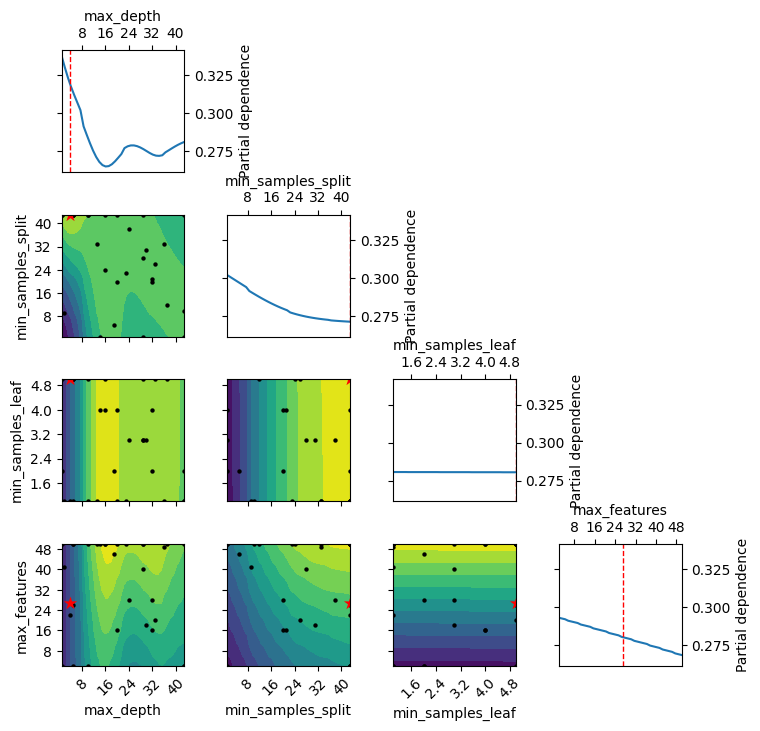

best_params =  OrderedDict([('max_depth', 4), ('max_features', 43), ('min_samples_leaf', 5), ('min_samples_split', 27)])
best_score (RMSE)=  0.48719965808865123
DecisionTreeClassifier  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  cv_rmse_mean  cv_rmse_std
2  DecisionTreeClassifier        0.771661      0.487138     0.007727
0      LogisticRegression        0.747744      0.503334     0.012257
1  DecisionTreeClassifier        0.568592      0.550256     0.003969


In [ ]:
from sklearn.tree import DecisionTreeRegressor
parsDists = {#'splitter': ["best", "random"],  # categorical parameter
             'max_depth': (1, x_train_balanced.shape[1]),  # integer valued parameter
             'min_samples_split': (2, 50),
             'min_samples_leaf': (1, 5),
             'max_features': (1, x_train.shape[1])#,
             # log-uniform: understand as search over p = exp(x) by varying x
             #'ccp_alpha': (1e-10, 1e+1, 'log-uniform')
             }
tree_reg2 = getOptimalModelViaBayesSearchCv(DecisionTreeClassifier(random_state=0),
                                            parsDists, x_train_balanced, y_train_balanced)
computeAccuracyAndRmseScores([tree_reg2])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import uniform
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
log_reg2 = LogisticRegression(solver='saga', random_state=0, max_iter=1000) 
search = RandomizedSearchCV(log_reg2, distributions, random_state=0, n_iter = 10, 
                            verbose=True, cv=3, scoring = 'neg_mean_squared_error')
search.fit(x_train, y_train.values.ravel())
print('best_params= ', search.best_params_)
print('best_score = ', -search.best_score_)
log_reg2 = search.best_estimator_#taking the best model
computeAccuracyAndRmseScores([log_reg2])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


best_params=  {'C': 3.3770629943240693, 'penalty': 'l1'}
best_score =  0.07932393462911898
LogisticRegression  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  cv_rmse_mean  cv_rmse_std
2  DecisionTreeClassifier        0.771661      0.487138     0.007727
0      LogisticRegression        0.747744      0.503334     0.012257
1  DecisionTreeClassifier        0.568592      0.550256     0.003969
3      LogisticRegression        0.516245      0.502994     0.012429


### Random Forest via GridSearchCV

* O modelo de random Forest otimizado nos entrega varios parametros diferentes com min_sample_split e n_estimators igual ao nosso modelo utilizado.  
Porém, apresentou um desempenho melhor com acurácia de 90% enquanto nosso modelo so chegou ate 85%c de acurácia.  
Portanto, este modelo nos fornece uma melhor classificação que os otimizados anteriormente

In [ ]:
from sklearn.model_selection import GridSearchCV 
randomForestParamsGrid = {'n_estimators': [100,150], 
                          'max_depth': [None, 5, x_train_balanced.shape[1]], 
              'max_features': [6, 8, x_train_balanced.shape[1]], 
              'min_samples_split': [20,25]}
forest_reg2 = RandomForestClassifier(random_state=0, bootstrap= False) 
grid_search = GridSearchCV(forest_reg2, randomForestParamsGrid, cv = 3, 
                           scoring = 'neg_mean_squared_error', 
                           return_train_score = True, 
                           verbose=True) 
grid_search.fit(x_train_balanced, y_train_balanced.values.ravel())
print('best_params= ', grid_search.best_params_)
print('best_score = ', -grid_search.best_score_)
forest_reg2 = grid_search.best_estimator_
computeAccuracyAndRmseScores([forest_reg2])

Fitting 3 folds for each of 36 candidates, totalling 108 fits


best_params=  {'max_depth': None, 'max_features': 6, 'min_samples_split': 20, 'n_estimators': 150}
best_score =  0.22371298813428386
RandomForestClassifier  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  cv_rmse_mean  cv_rmse_std
4  RandomForestClassifier        0.907604      0.472940     0.006389
2  DecisionTreeClassifier        0.771661      0.487138     0.007727
0      LogisticRegression        0.747744      0.503334     0.012257
1  DecisionTreeClassifier        0.568592      0.550256     0.003969
3      LogisticRegression        0.516245      0.502994     0.012429


### Random Forest via BayesSearchCV

In [ ]:
from skopt.space import Real, Categorical, Integer

* Já ao passarmos o modelo de random forest por outro otimizador vemos uma diferença tanto nos parametros quanto na acurácia, tivemos uma acurácia mais baixa (84% ) que em relação ao modelo anteriormente otimizado e ate mesmo modelo de random forest manualmente definido.  
Assim, o uso destes parametros não garante que este modelo será o melhor.

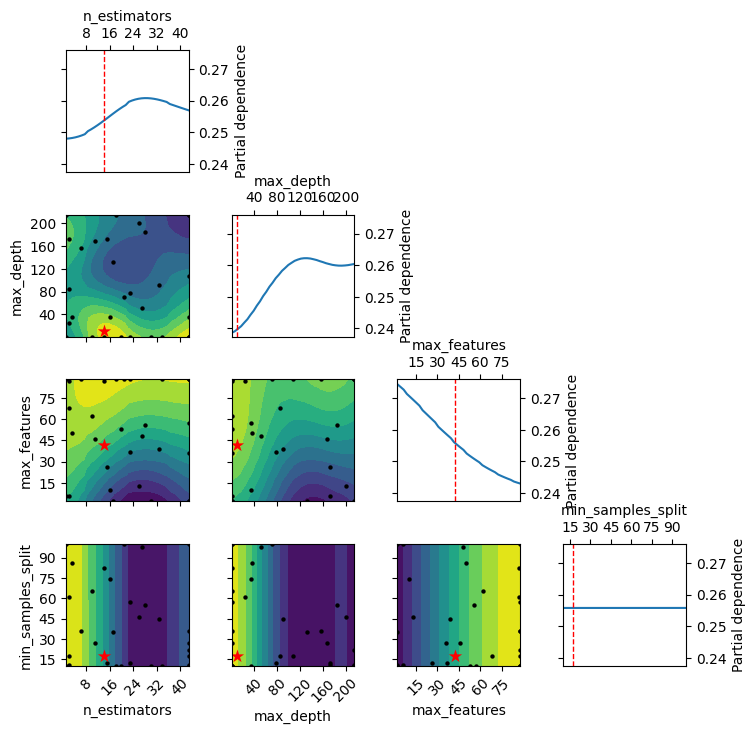

best_params =  OrderedDict([('max_depth', 14), ('max_features', 10), ('min_samples_split', 42), ('n_estimators', 17)])
best_score (RMSE)=  0.47571843939269776
RandomForestClassifier  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  cv_rmse_mean  cv_rmse_std
4  RandomForestClassifier        0.907604      0.472940     0.006389
5  RandomForestClassifier        0.840253      0.475699     0.004324
2  DecisionTreeClassifier        0.771661      0.487138     0.007727
0      LogisticRegression        0.747744      0.503334     0.012257
1  DecisionTreeClassifier        0.568592      0.550256     0.003969
3      LogisticRegression        0.516245      0.502994     0.012429


In [ ]:
forest_reg3 = RandomForestClassifier(random_state=0, bootstrap=False) 
parsDists = {'n_estimators': Integer(10, 100, 'uniform'), 
             'max_depth': Integer(1, x_train_balanced.shape[1], 'uniform'), 
              'max_features': Integer(1, 5*x_train_balanced.shape[1], 'uniform'), 
              'min_samples_split': Integer(2, int(.01*len(x_train_balanced)), 'uniform')}
forest_reg3 = getOptimalModelViaBayesSearchCv(forest_reg3, parsDists, x_train_balanced, y_train_balanced)
computeAccuracyAndRmseScores([forest_reg3])

### XGBoost via GridSearchCV

* O modelo de XGBoost foi o com melhor desempenho até agora com 99% de acurácia o que pode indicar um possivel overfiting.   
Também observamos que ele nos entrega parametros bem diferentes do que os quais usamos no modelo manualmente definido mas com uma acurácia bem parecida com o modelo XGBoost manualmente definido.

In [ ]:
computeAccuracyAndRmseScores([xgb_reg])

XGBRegressor  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  cv_rmse_mean  cv_rmse_std
4  RandomForestClassifier        0.907604      0.472940     0.006389
5  RandomForestClassifier        0.840253      0.475699     0.004324
2  DecisionTreeClassifier        0.771661      0.487138     0.007727
0      LogisticRegression        0.747744      0.503334     0.012257
1  DecisionTreeClassifier        0.568592      0.550256     0.003969
6            XGBRegressor        0.539711      0.432841     0.007808
3      LogisticRegression        0.516245      0.502994     0.012429


In [ ]:
import xgboost as xg
from sklearn.model_selection import GridSearchCV 
XGBParamsGrid = {'n_estimators':[5, 10, 20], 
                 'max_depth': [4, 10, x_train_balanced.shape[1]], 
                 'eta': [.01, .1, .3], 
                 'colsample_bytree': [.2, .5, 1]
                 }
XGB_reg2 = xg.XGBRegressor() 
XGB_grid_search = GridSearchCV(XGB_reg2, XGBParamsGrid, cv = 3, return_train_score = True, 
                               verbose=False, scoring = 'neg_mean_squared_error') 
XGB_grid_search.fit(x_train_balanced, y_train_balanced.values.ravel())
print('best_params= ', XGB_grid_search.best_params_)
print('best_score = ', -XGB_grid_search.best_score_)
XGB_reg2 = XGB_grid_search.best_estimator_
computeAccuracyAndRmseScores([XGB_reg2])

best_params=  {'colsample_bytree': 1, 'eta': 0.3, 'max_depth': 4, 'n_estimators': 20}
best_score =  0.15283543680698622
XGBRegressor  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  cv_rmse_mean  cv_rmse_std
4  RandomForestClassifier        0.907604      0.472940     0.006389
5  RandomForestClassifier        0.840253      0.475699     0.004324
7            XGBRegressor        0.796593      0.390934     0.002531
2  DecisionTreeClassifier        0.771661      0.487138     0.007727
0      LogisticRegression        0.747744      0.503334     0.012257
1  DecisionTreeClassifier        0.568592      0.550256     0.003969
6            XGBRegressor        0.539711      0.432841     0.007808
3      LogisticRegression        0.516245      0.502994     0.012429


### XGBoost via BayesSearchCV

Ja o modelo XGBoost via BayesSearchCV nos entrega parametros bem diferentes e maiores do que o modelo XGBoost apresentado anteriormente esses parametros estão bem mais proximos que os definidos manualmente.  
Porém, esta otimização nos entrega uma acurácia pior do que o modelo via GridSearchCV.

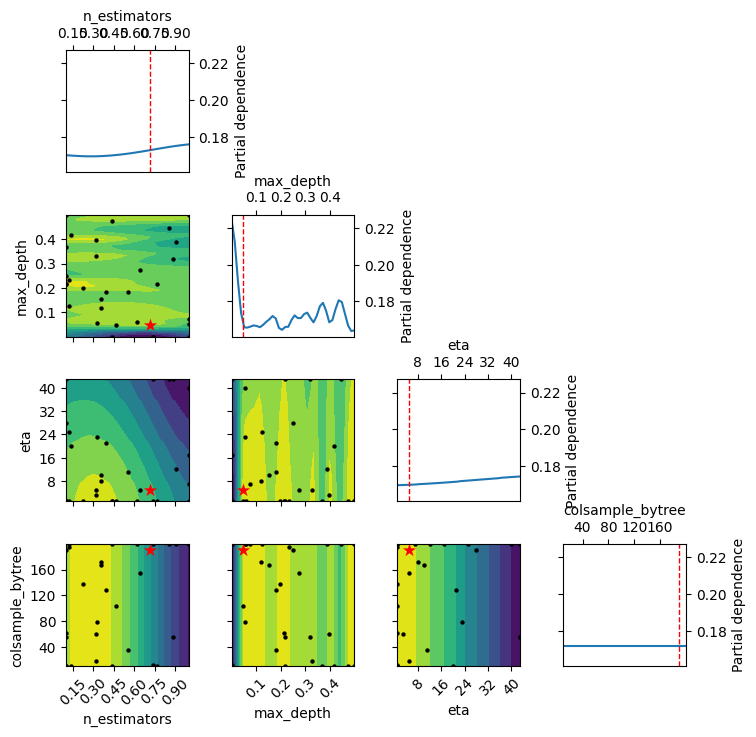

best_params =  OrderedDict([('colsample_bytree', 0.717794233686768), ('eta', 0.048843673433109636), ('max_depth', 5), ('n_estimators', 190)])
best_score (RMSE)=  0.3906860855183527
XGBRegressor  ok 
 --------------------------- Rank via train set-based Accuracy and RMSE-based Cross-validation --------------------------- 
                    model  train_accuracy  cv_rmse_mean  cv_rmse_std
4  RandomForestClassifier        0.907604      0.472940     0.006389
5  RandomForestClassifier        0.840253      0.475699     0.004324
8            XGBRegressor        0.823443      0.390667     0.003910
7            XGBRegressor        0.796593      0.390934     0.002531
2  DecisionTreeClassifier        0.771661      0.487138     0.007727
0      LogisticRegression        0.747744      0.503334     0.012257
1  DecisionTreeClassifier        0.568592      0.550256     0.003969
6            XGBRegressor        0.539711      0.432841     0.007808
3      LogisticRegression        0.516245      0.502994 

In [ ]:
import xgboost as xg
xgb_reg3 = getOptimalModelViaBayesSearchCv(modelObj=xg.XGBRegressor(),
                                        parsDists={
                                            'n_estimators': Integer(10, 200, 'uniform'), 
                                            'max_depth': Integer(1, x_train_balanced.shape[1], 'uniform'), 
                                            'eta': Real(.001, .5, 'uniform'), 
                                            'colsample_bytree': Real(.1, 1, 'uniform')}, 
                                            x_train=x_train_balanced, y_train=y_train_balanced)
computeAccuracyAndRmseScores([xgb_reg3])

###  Consideração dos modelos
* Pelo Rank de acurácia e erro dos modelos otimizados vemos que quem se saiu melhor foi os modelos de XGBoost e de random forest enquanto o pior modelo foi o de regressão linear.

# 3.3 Medidas de desempenho

## 3.1.2 Modelos balanceados

### Linear regression

* Falaremos sobre as medidas de erro do modelo de regressão linear.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
lin_reg = LinearRegression() 
lin_reg.fit(x_train_balanced,y_train_balanced)

LinearRegression()

* O modelo de regressão linear possui uma acurácia de 74%, porém vemos que os erros do modelo são muito altos.  
Veja que o erro RMSE esta em 0.50 e MAE em 0.25, alem disso R^2 esta muito proximo de 0 o que indica que este modelo não se aplica bem aos nossos dados.

In [ ]:
some_labels = y_train_balanced
y_pred = [round(y_p) for y_p in lin_reg.predict(x_train_balanced)]
some_cases = pd.DataFrame({'hospital_death': some_labels, 'linear reg prediction': y_pred})
y_train_predictions = [round(y_hat) for y_hat in y_pred]
printPerformanceMeasures(model= lin_reg, y_true=y_train_balanced, y_pred=y_train_predictions)


LinearRegression  ACCURACY =  0.7427797833935018
LinearRegression  RMSE =  0.5071688245609131
LinearRegression  RMSE =  0.5071688245609131
LinearRegression  MAE =  0.2572202166064982
LinearRegression  R^2 =  -0.028880866425992746


### Logistic regression

Abaixo o modelo de regressão logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',C=1.5,solver='saga') 
log_reg.fit(x_train_balanced, y_train_balanced)

c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1.5, penalty='l1', solver='saga')

* No modelo de regressão temos um desempenho bem melhor, com uma acurácia de 76% e um erro RMSE de 0.48 e MAE 0.23 tendo um desempenho melhor que o modelo de regressão linear visto antes.  
Alem de o valor de R^2 esta bem maior o que indica um melhor desempenho e melhor adequação aos dados.

In [ ]:
y_test_predictions = [round(y_hat) for y_hat in log_reg.predict(x_teste_balanced)]
printPerformanceMeasures(model= log_reg, y_true=y_test_balanced, y_pred=y_test_predictions)

LogisticRegression  ACCURACY =  0.7612815884476535
LogisticRegression  RMSE =  0.48858818196140047
LogisticRegression  RMSE =  0.48858818196140047
LogisticRegression  MAE =  0.23871841155234658
LogisticRegression  R^2 =  0.045126353790613694


### Decision tree

* Abaixo segue o modelo de arvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_reg = DecisionTreeClassifier(criterion='entropy',random_state=0, min_samples_split = 5) 
tree_reg.fit(x_train_balanced, y_train_balanced)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=0)

* Abaixo vemos que o modelo de arvore de decisão teve um pior desempenho em relação ao anterior, suas medidas de erro MAE e RMSE foram maiores além de R^2 estar mais proximo de 0.  
Portanto vemos que este modelo não é o mais adequado ao nosso conjunto de dados.  

In [ ]:
y_test_predictions = [round(y_hat) for y_hat in tree_reg.predict(x_teste_balanced)]
printPerformanceMeasures(model= tree_reg, y_true=y_test_balanced, y_pred=y_test_predictions)

DecisionTreeClassifier  ACCURACY =  0.7233754512635379
DecisionTreeClassifier  RMSE =  0.5259510896808391
DecisionTreeClassifier  RMSE =  0.5259510896808391
DecisionTreeClassifier  MAE =  0.2766245487364621
DecisionTreeClassifier  R^2 =  -0.10649819494584833


### Random forest Classifier

* Abaixo seguira o modelo de floresta de classificação

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier(random_state=0, min_samples_split = 20, 
                     n_estimators=150,criterion= 'entropy',max_features= 'log2') 

forest_reg.fit(x_train_balanced, y_train_balanced)


RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=20, n_estimators=150, random_state=0)

Já o modelo de floresta foi o melhor ate agora, com uma acurácia de 79% o modelo se mostra superior em relação aos demais, suas medidad de erro foram bem menores com RMSE 46% e MAE  de 21%.  
Além disso, R^2 esta be mais proximo de 1 do que os modelos anteriores  indicando que é um modelo que se ajust melhor aos dados.

In [ ]:

y_test_predictions = [round(y_hat) for y_hat in forest_reg.predict(x_teste_balanced)]
printPerformanceMeasures(model= forest_reg, y_true=y_test_balanced, y_pred=y_test_predictions)

RandomForestClassifier  ACCURACY =  0.7892599277978339
RandomForestClassifier  RMSE =  0.45906434429409354
RandomForestClassifier  RMSE =  0.45906434429409354
RandomForestClassifier  MAE =  0.21074007220216606
RandomForestClassifier  R^2 =  0.15703971119133575


### XGBoost Regression

* Abaixo veremos o modelo XGBoost

In [ ]:
# %pip install xgboost
import xgboost as xg
xgb_reg = xg.XGBRegressor(objective ='binary:logistic', n_estimators = 100,
                            seed = 0, max_depth = x_train_balanced.shape[1])
xgb_reg.fit(x_train_balanced, y_train_balanced)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=43, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='binary:logistic', ...)

* Este modelo tem um desempenho consideravelmente bom, com uma acurácia de 75%, porém vemos  que suas medidas de erro estao elevadas com RMSE de 0.50 MAE de 0.25 e ao observamos R^2 vemos que esta mais proximo de 0 o que indica que este modelo não se ajustou bem aos dados.

In [ ]:
y_test_predictions = [round(y_hat) for y_hat in xgb_reg.predict(x_teste_balanced)]
printPerformanceMeasures(model= tree_reg, y_true=y_test_balanced, y_pred=y_test_predictions)

DecisionTreeClassifier  ACCURACY =  0.7486462093862816
DecisionTreeClassifier  RMSE =  0.501351962810278
DecisionTreeClassifier  RMSE =  0.501351962810278
DecisionTreeClassifier  MAE =  0.25135379061371843
DecisionTreeClassifier  R^2 =  -0.005415162454873723


### ANN

* Abaixo seguirá o modelo de ANN.

In [ ]:
from sklearn.neural_network import MLPRegressor
ann_reg = MLPRegressor(random_state=0, hidden_layer_sizes=(200),learning_rate_init=0.05,learning_rate='constant',
                       activation='relu', max_iter=1000)
ann_reg.fit(x_train_balanced, y_train_balanced)#.values.ravel())ctions)

MLPRegressor(hidden_layer_sizes=200, learning_rate_init=0.05, max_iter=1000,
             random_state=0)

* Este modelo tambem possui uma acurácia consideravelmente boa e além disso suas medidad de erro estao menores em relação ao anterir com RMSE de 0.47 e MAE de 0.22.  
O modelo tambem se mostra bem adequado aos dados por possuir R^2 mais proximo de 0.

In [ ]:

y_test_predictions = [round(y_hat) for y_hat in ann_reg.predict(x_teste_balanced)]
printPerformanceMeasures(model= tree_reg, y_true=y_test_balanced, y_pred=y_test_predictions)

DecisionTreeClassifier  ACCURACY =  0.776173285198556
DecisionTreeClassifier  RMSE =  0.47310328132601664
DecisionTreeClassifier  RMSE =  0.47310328132601664
DecisionTreeClassifier  MAE =  0.22382671480144403
DecisionTreeClassifier  R^2 =  0.10469314079422387


### Melhor modelo

* É possivel observar que o modelo com maior desempenho foi o modelo de ramdom forest, este modelo foi o melhor ajustado aos dados e que classificou os dados de forma mais corretamente.

# 4 Limitações deste estudo

---> Como limitações desse estudo podemos destacar:  
- Se faz necessário um aprofundamento melhor sobre balanceamento de dados;
- Um melhor aprofundamento em modelos de machine learning;

# 5 Referências

* Para se ter os valores de sinais vitais para idosos:  
1- [http://hospitaldocoracaoms.com.br/blog/monitoramento-dos-sinais-vitais-covid-19/- #:~:text=O%20Minist%C3%A9rio%20da%20Sa%C3%BAde%20estabeleceu,entre%2060%20e%2090%20mmHg.  ](http://hospitaldocoracaoms.com.br/blog/monitoramento-dos-sinais-vitais-covid-19/#:~:text=O%20Minist%C3%A9rio%20da%20Sa%C3%BAde%20estabeleceu,entre%2060%20e%2090%20mmHg.)  
2- https://telemedicinamorsch.com.br/blog/sinais-vitais

* Para consulta e aprendizado:  
1-  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition.  
2- https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b
